## Install a package from a different conda channel

### If you had issues installing ydata-profiling previously

Open a terminal (Anaconda Terminal) and run the following commands.

*If you are using a custom conda environment, run this first:*

    conda activate <ENV_NAME>
    
Then:

    conda install -c conda-forge ydata-profiling==4.5.0 -y
    
OR from a jupyter cell:

    !conda install -c conda-forge ydata-profiling==4.5.0 -y

OR if conda doesn't work:

    !pip install -U ydata-profiling


- The `<ENV_NAME>` refers to the name of the environment you'll be working with for this project
- The `!` indicates a terminal command
- The `-c` flag indicates the channel we're using to get the package
- The `-y` flag indicates that we're confirming the installation of pandas-profiling and its dependencies a priori

We're installing `ydata-profiling` through this method because Anaconda's `default` channel contains an outdated version of this package, whereas the channel `conda-forge` has an updated version.


In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product

## If you have an error here saying ydata_profiling is not available
## Run the instructions above
## IF you are still unable to install `ydata-profiling` through this method, 
## Comment out the line below importing ProfileReport
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

# Context
The data we will be using through the pratical classes comes from a small relational database whose schema can be seen below:
![alt text](../figures/schema.png "Relation database schema")

# Reading the Data

In [2]:
# path to database
my_path = os.path.join("..", "data", "datamining.db")

# connect to the database
conn = sqlite3.connect(my_path)

# the query
query = """
select
    age, 
    income, 
    frq, 
    rcn, 
    mnt, 
    clothes, 
    kitchen, 
    small_appliances, 
    toys, 
    house_keeping,
    dependents, 
    per_net_purchase,
    g.gender, 
    e.education, 
    m.status, 
    r.description
from customers as c
    join genders as g on g.id = c.gender_id
    join education_levels as e on e.id = c.education_id
    join marital_status as m on m.id = c.marital_status_id
    join recommendations as r on r.id = c.recommendation_id
order by c.id;
"""

df = pd.read_sql_query(query, conn)

# Metadata
- *id* - The unique identifier of the customer
- *age* - The year of birht of the customer
- *income* - The income of the customer
- *frq* - Frequency: number of purchases made by the customer
- *rcn* - Recency: number of days since last customer purchase
- *mnt* - Monetary: amount of € spent by the customer in purchases
- *clothes* - Number of clothes items purchased by the customer
- *kitchen* - Number of kitchen items purchased by the customer
- *small_appliances* - Number of small_appliances items purchased by the customer
- *toys* - Number of toys items purchased by the customer
- *house_keeping* - Number of house_keeping items purchased by the customer
- *dependents* - Binary. Whether or not the customer has dependents
- *per_net_purchase* - Percentage of purchases made online
- *education* - Education level of the customer
- *status* - Marital status of the customer
- *gender* - Gender of the customer
- *description* - Last customer's recommendation description

# Initial Analysis

Pandas user guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

Pandas 10 min tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

## Potential Problems:
- Duplicates?
- Data types?
- Missing values?
- Strange values?
- Descriptive statistics?

### Insights from previous notebook:

- Duplicates?
    - We didn't find any
- Data types?
    - `income` was being recognized as `object` (empty strings)
    - `dependents` was being recognized as `object` (empty strings)
- Missing values?
    - replaced empty strings '""' with `np.nan` to reflect that these were missing values
- Strange values?
    - `education` has `OldSchool` category
- Descriptive statistics?
    - We explored this in detail


### Replicating modifications from previous notebook

In [3]:
# replace "" by nans
df.replace("", np.nan, inplace=True)

# count of missing values
df.isna().sum()

C:\Users\Diogo\AppData\Local\Temp\ipykernel_7120\3385904135.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("", np.nan, inplace=True)


age                   0
income               46
frq                   0
rcn                   0
mnt                   0
clothes               0
kitchen               0
small_appliances      0
toys                  0
house_keeping         0
dependents          282
per_net_purchase      0
gender                0
education            47
status              177
description           0
dtype: int64

In [4]:
# fix wrong dtypes
df.dependents = df.dependents.astype(
    "boolean"
)  # converting to "boolean" over "bool" allows preservation of NaNs

In [5]:
# check dataset data types again
df.dtypes

age                   int64
income              float64
frq                   int64
rcn                   int64
mnt                   int64
clothes               int64
kitchen               int64
small_appliances      int64
toys                  int64
house_keeping         int64
dependents          boolean
per_net_purchase      int64
gender               object
education            object
status               object
description          object
dtype: object

In [6]:
# check descriptive statistics again
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,8998.0,NaN,NaN,NaN,1966.05968,17.296552,1936.0,1951.0,1966.0,1981.0,1996.0
income,8952.0,NaN,NaN,NaN,69963.550827,27591.556226,10000.0,47741.0,70030.5,92218.0,140628.0
frq,8998.0,NaN,NaN,NaN,19.848077,10.903435,3.0,10.0,17.0,28.0,59.0
rcn,8998.0,NaN,NaN,NaN,62.469771,69.761802,0.0,26.0,53.0,79.0,549.0
mnt,8998.0,NaN,NaN,NaN,622.162814,646.768205,6.0,63.0,383.0,1076.0,3052.0
clothes,8998.0,NaN,NaN,NaN,50.446655,23.422249,1.0,33.0,51.0,69.0,99.0
kitchen,8998.0,NaN,NaN,NaN,7.039675,7.848139,0.0,2.0,4.0,10.0,75.0
small_appliances,8998.0,NaN,NaN,NaN,28.524116,12.586437,1.0,19.0,28.0,37.0,74.0
toys,8998.0,NaN,NaN,NaN,7.036897,7.924422,0.0,2.0,4.0,10.0,62.0
house_keeping,8998.0,NaN,NaN,NaN,6.929984,7.882655,0.0,2.0,4.0,9.0,77.0


# Visual Exploration

Matplotlib tutorials: https://matplotlib.org/stable/tutorials/index.html

Matplotlib gallery: https://matplotlib.org/stable/gallery/index.html

Seaborn tutorials: https://seaborn.pydata.org/tutorial.html


Seaborn gallery: https://seaborn.pydata.org/examples/index.html

### Matplotlib vs Seaborn:

**Matplotlib** - lower level. allows to fully customize the plot appearance

**Seaborn** - higher level. Complex off-the-shelf plots with one line. Matplotlib on steroids


In [7]:
# Define metric and non-metric features. Why?
non_metric_features = ["education", "status", "gender", "dependents", "description"]
metric_features = df.columns.drop(non_metric_features).to_list()

######## OR ########
# metric_features = ['age', 'income', 'frq', 'rcn', 'mnt',
#                    'clothes', 'kitchen', 'small_appliances', 'toys', 'house_keeping',
#                    'per_net_purchase']

## Pyplot-style vs Object-Oriented-style
- Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

More details: https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

## Numeric Variables' Univariate Distribution

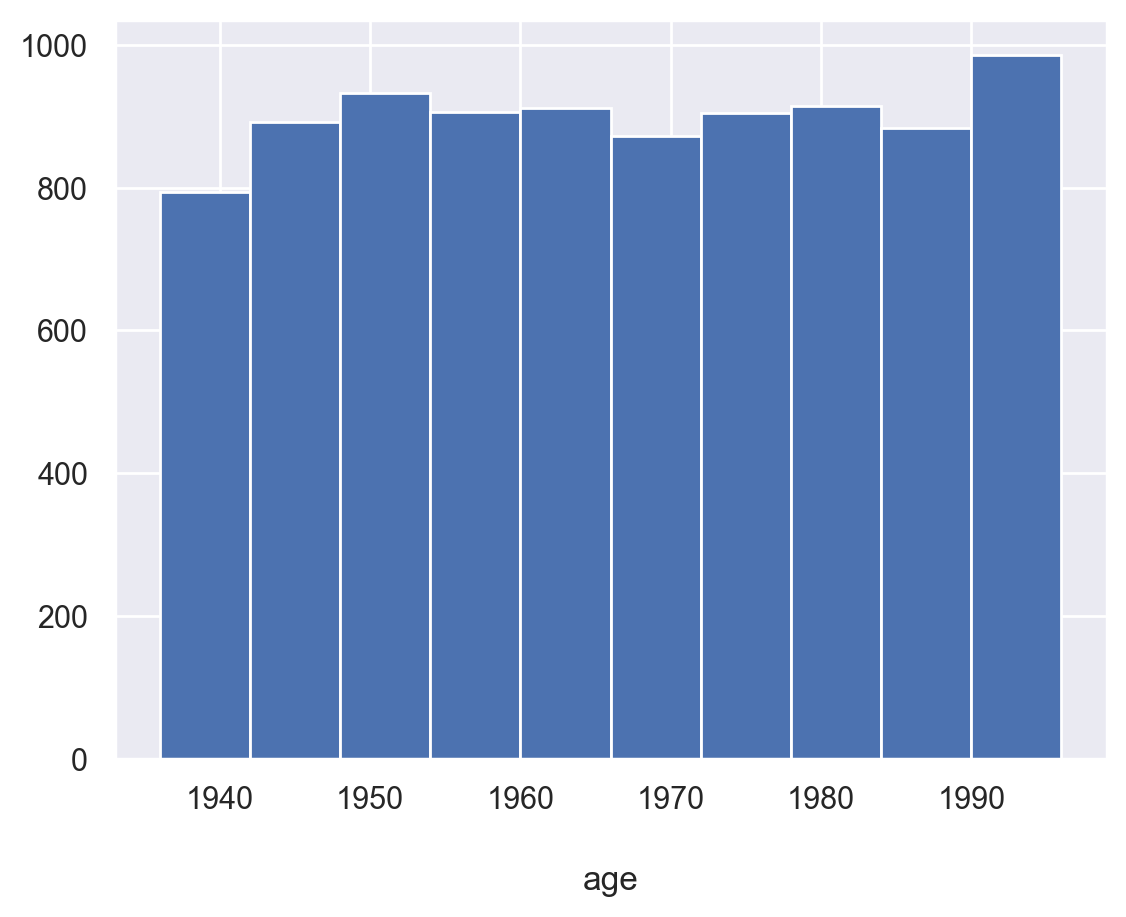

In [8]:
# Single Metric Variable Histogram
plt.hist(df["age"], bins=10)  # mess around with the bins
plt.title("age", y=-0.2)

plt.show()

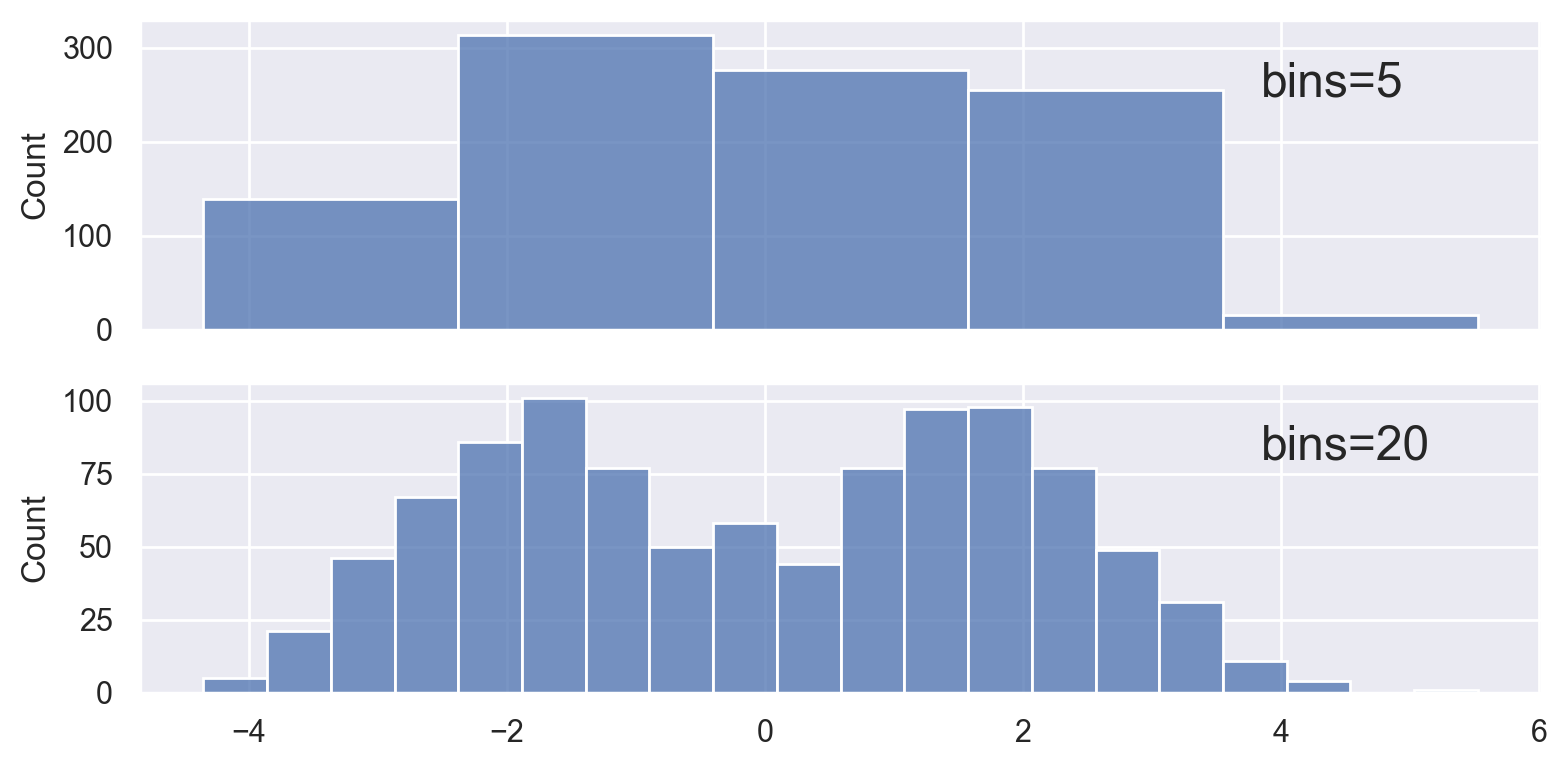

In [9]:
## Why change bins?

##########################################
## NO NEED to understand this code, this just generates some random numbers ##############
##########################################

rng = np.random.default_rng(84038410067234)

rn_size = 500
rn_bins = 8
rn_loc = 1.75

hist_data = np.concatenate(
    [
        rng.normal(loc=rn_loc, size=rn_size).round(5),
        rng.normal(loc=-rn_loc, size=rn_size).round(5),
    ]
)
##########################################


fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True, tight_layout=True)

sns.histplot(
    hist_data,
    ax=axes[0],
    bins=5,  ## This is the only thing we change
)
sns.histplot(
    hist_data,
    ax=axes[1],
    bins=20,  ## This is the only thing we change
)

axes[0].set_title("bins=5", ha="left", x=0.8, y=0.7, fontsize="x-large")
axes[1].set_title("bins=20", ha="left", x=0.8, y=0.7, fontsize="x-large")

plt.show()

In [10]:
## plot histogram for income, compare with the histogram of age

# Single Metric Variable Histogram


plt.show()

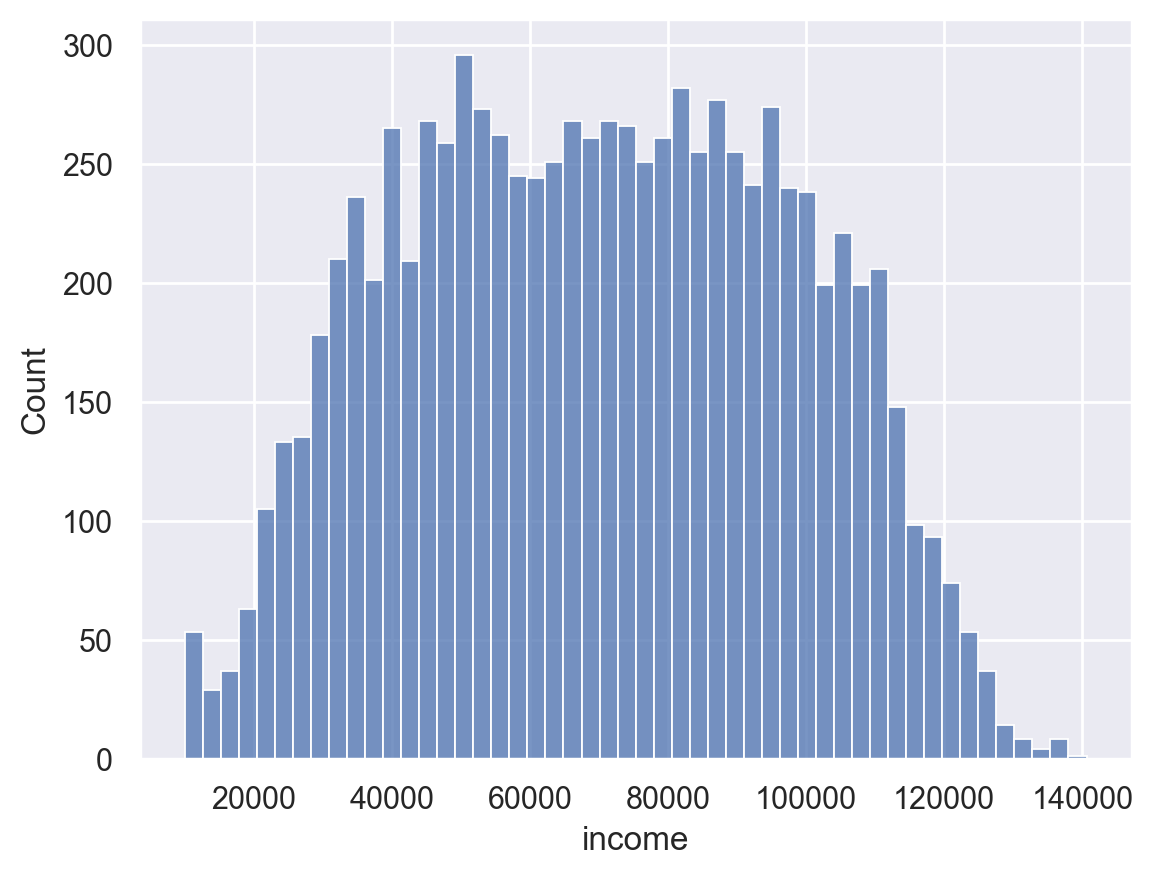

In [11]:
## BONUS: use seaborn scatterplot

sns.histplot(df["income"], bins=50)  # mess around with the bins
plt.show()

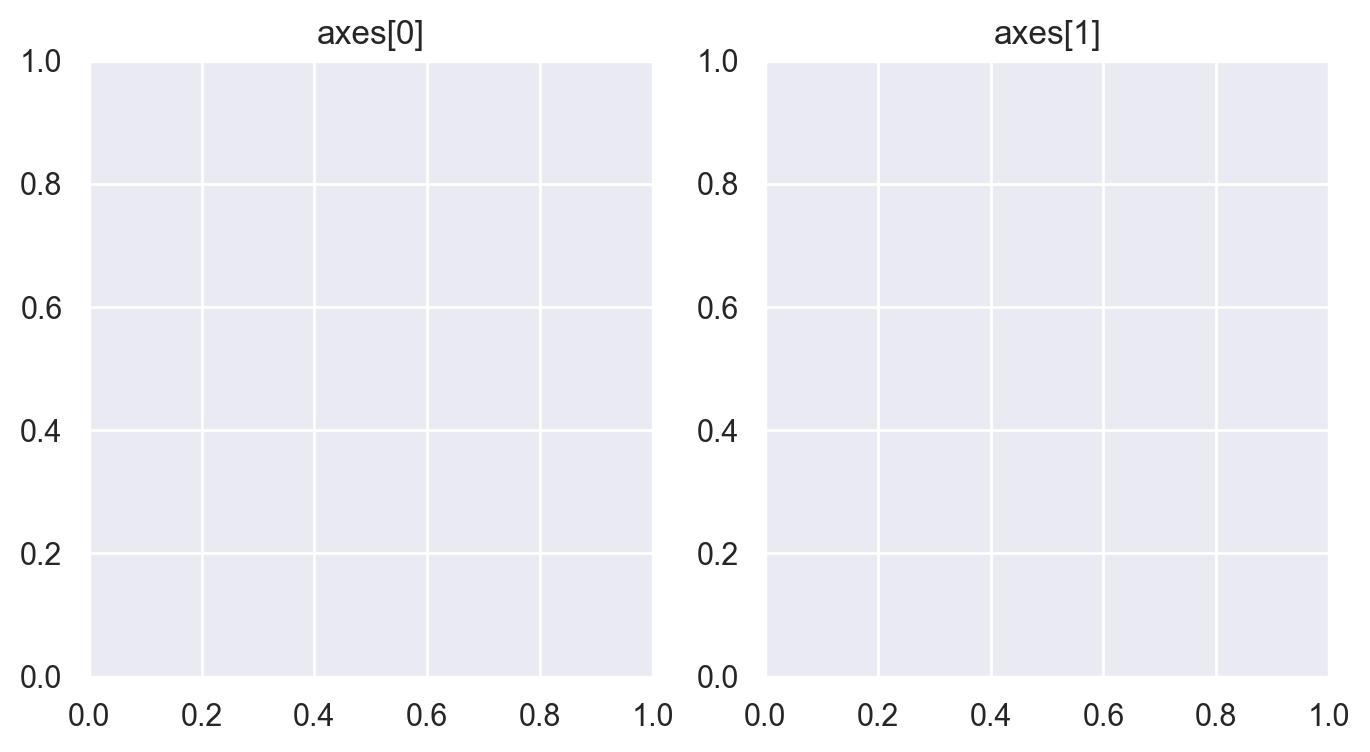

In [12]:
## Do this for mnt and frq
## CHALLENGE: Plot both in the same figure
## HINT: Use subplots

sns.set()

subplot_figsize = (8, 4)  # (width, height)

fig, axes = plt.subplots(1, 2, figsize=subplot_figsize)  # nrows  # ncols

## Do something here

## 1. HINT: use axes[i].hist() instead of plt.hist()

## 2. HINT: don't forget to label each subplot!
axes[0].set_title("axes[0]")  ## What should the title be?
axes[1].set_title("axes[1]")  ## What should the title be?


plt.show()

### How can we improve our visualizations?

Remember Lecture discussion: Session 4, slide 22


**Remove chart-junk, increase data-ink**




https://seaborn.pydata.org/tutorial/aesthetics.html

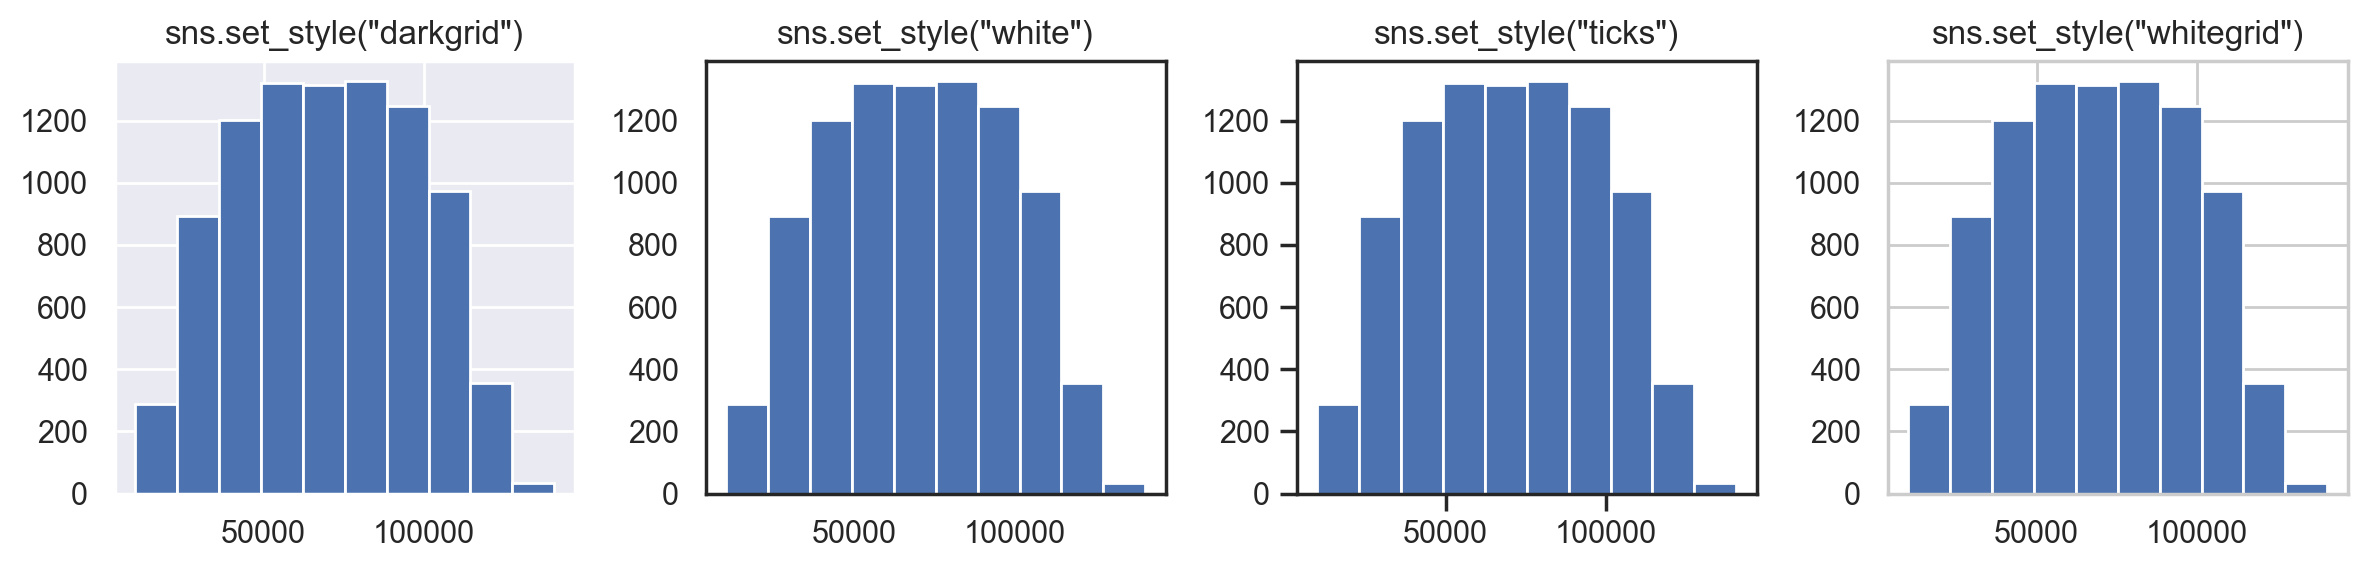

In [13]:
## plot histogram for income, test different seaborn themes

##########################################
## NO NEED to understand this code
##########################################

seaborn_styles = ["darkgrid", "white", "ticks", "whitegrid"]

f = plt.figure(figsize=(12, 3))
gs = f.add_gridspec(1, 4)

for style_i, sns_style in enumerate(seaborn_styles):

    with sns.axes_style(sns_style):
        ax = f.add_subplot(gs[0, style_i])

        ax.hist(df["income"], bins=10)
        ax.set_title('sns.set_style("{}")'.format(sns_style))

f.tight_layout()


plt.show()

You can also optimize for the context in which you are using your visualizations:

https://seaborn.pydata.org/tutorial/aesthetics.html#scaling-plot-elements


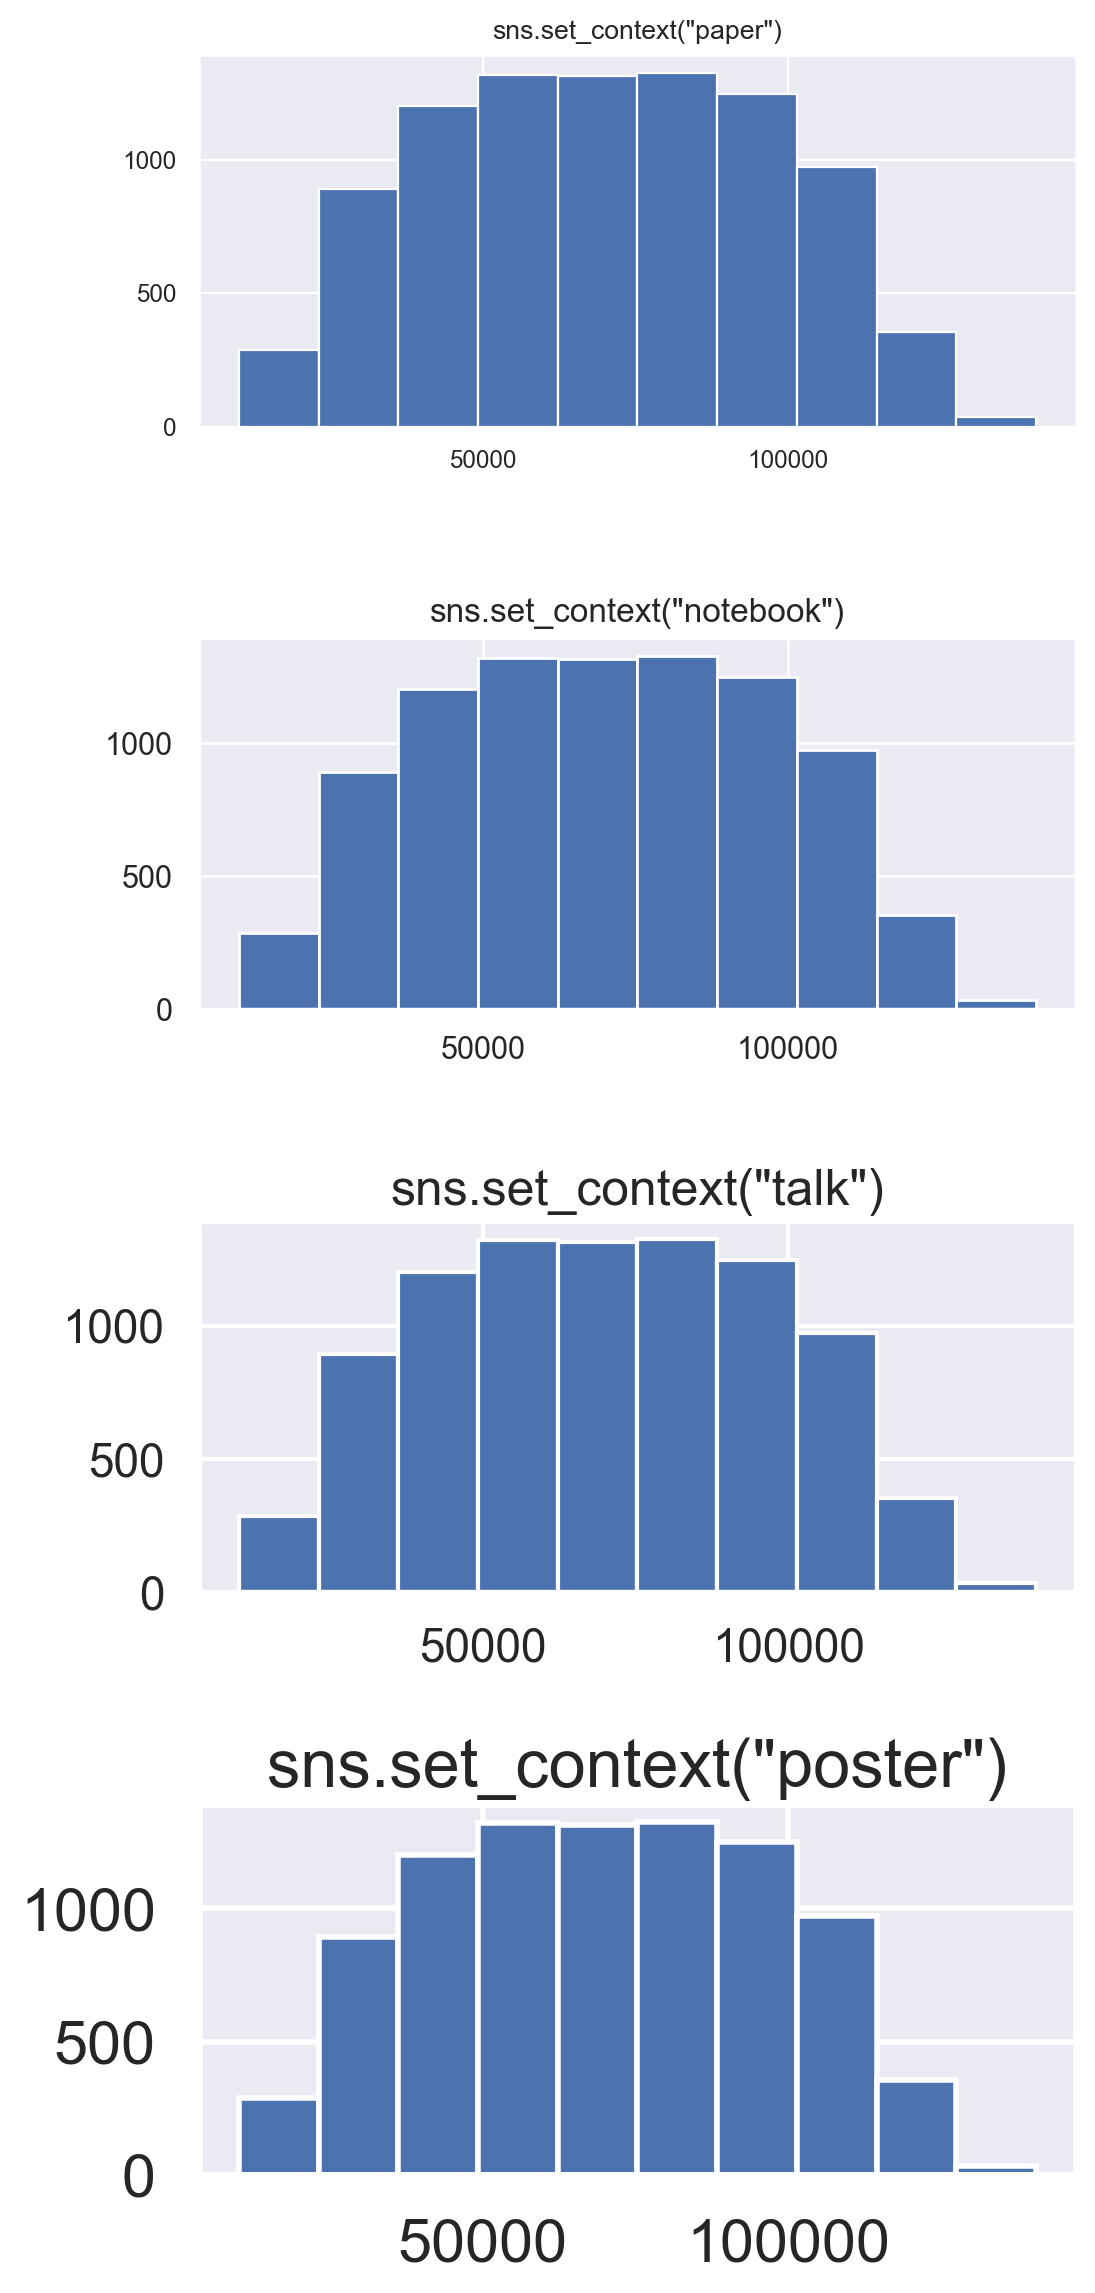

In [14]:
## plot histogram for income, test different seaborn themes

##########################################
## NO NEED to understand this code
##########################################

sns.set()  ## Reset to darkgrid

seaborn_ctx = ["paper", "notebook", "talk", "poster"]

f = plt.figure(figsize=(6, 12))
gs = f.add_gridspec(4, 1)

for ctx_i, sns_ctx in enumerate(seaborn_ctx):
    sns.set_context(sns_ctx)

    ax = f.add_subplot(gs[ctx_i, 0])

    ax.hist(df["income"], bins=10)
    ax.set_title('sns.set_context("{}")'.format(sns_ctx))

f.tight_layout()


plt.show()

In [15]:
sns.set()  ## Reset to darkgrid

Using seaborn to set the style also changes the non-seaborn plot styles:

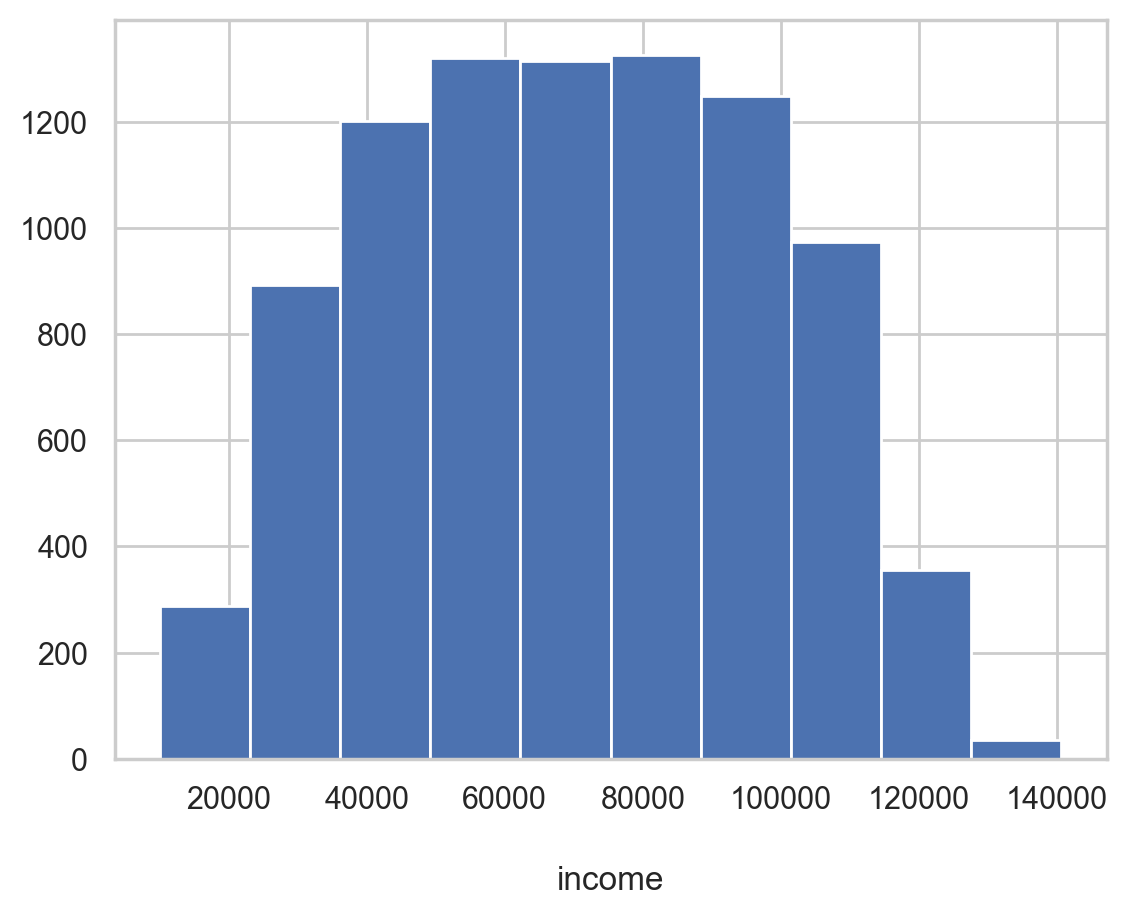

In [16]:
## Try it here:
sns.set_style("whitegrid")

plt.hist(df["income"], bins=10)
plt.title("income", y=-0.2)

plt.show()

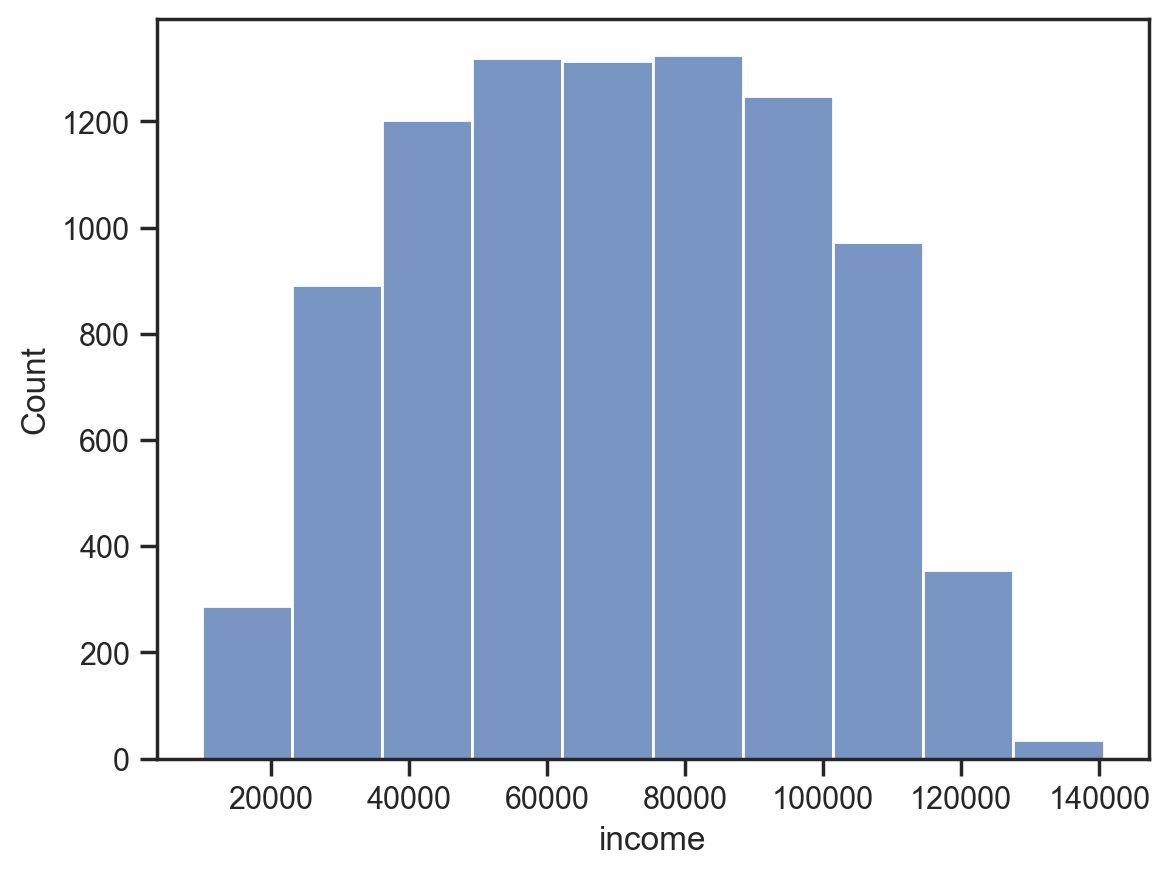

In [17]:
## using seaborn histplot:
sns.set_style("ticks")

sns.histplot(df["income"], bins=10)


plt.show()

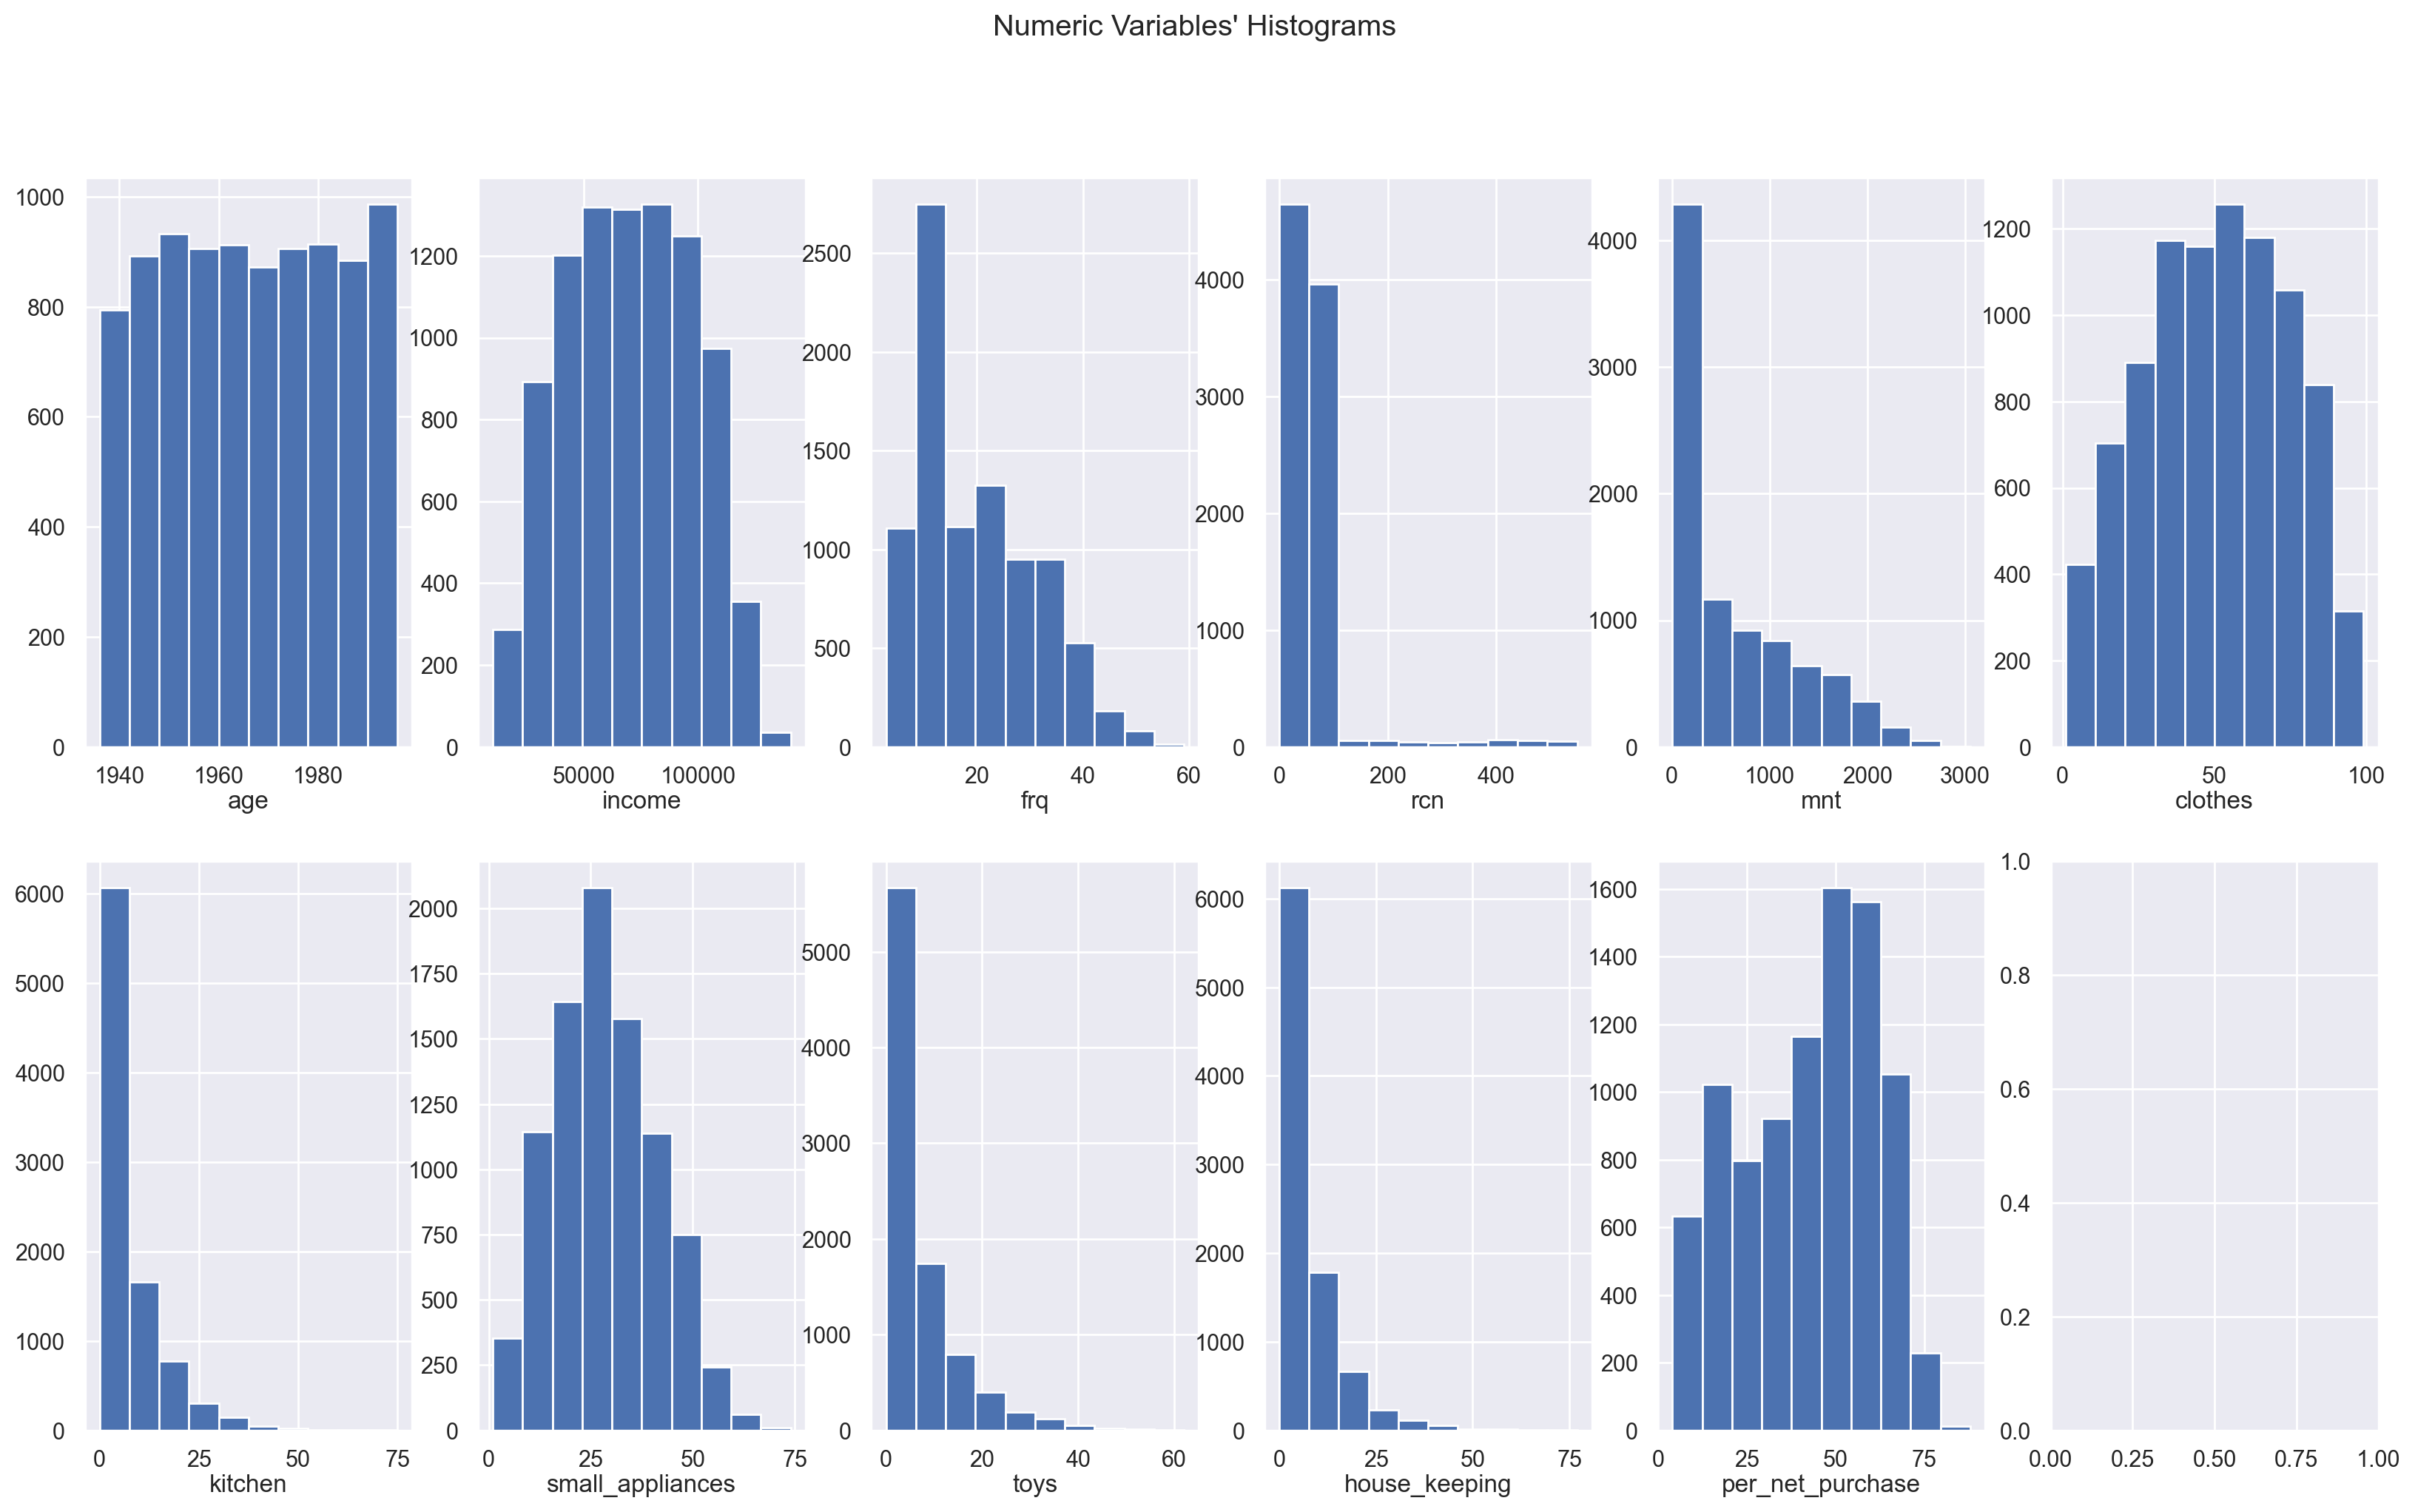

In [18]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set()  ## Reset to darkgrid

sp_rows = 2
sp_cols = 6


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(
    axes.flatten(), metric_features
):  # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join("..", "figures", "eda")):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join("..", "figures", "eda"))

plt.savefig(
    os.path.join("..", "figures", "eda", "numeric_variables_histograms.png"), dpi=200
)

plt.show()

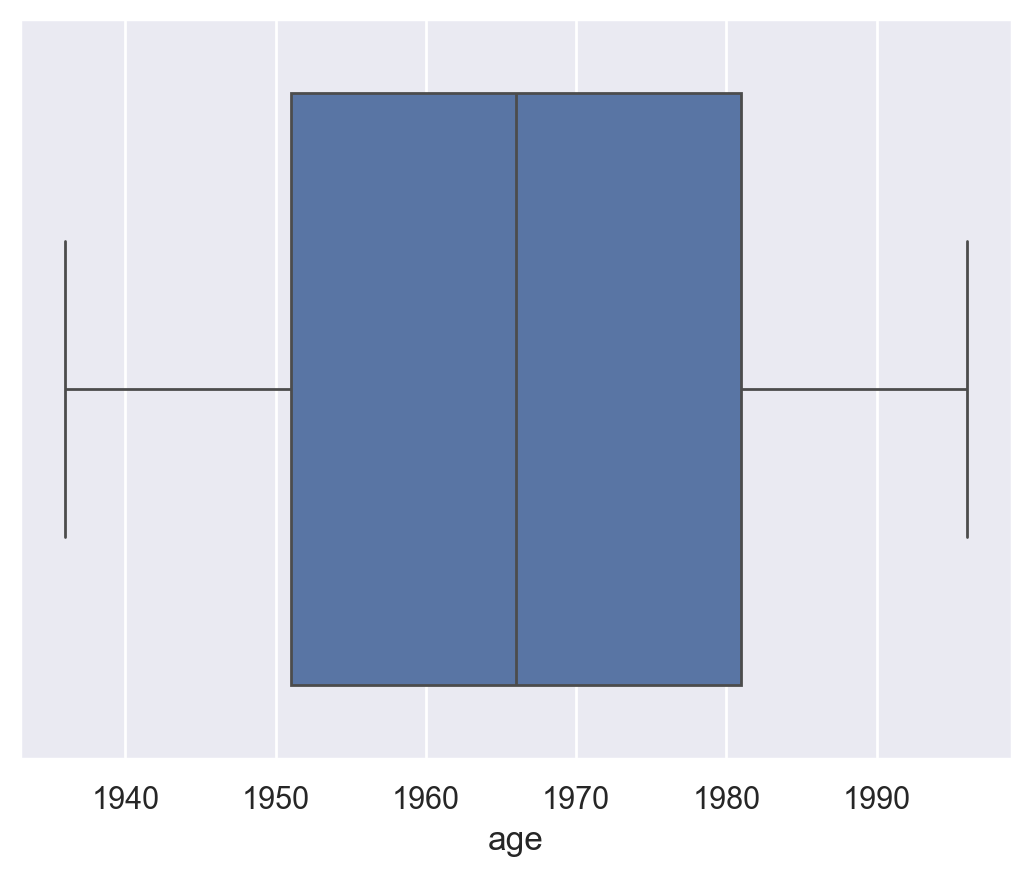

In [19]:
# Single Metric Variable Box Plot
sns.boxplot(x=df["age"])

plt.show()

In [20]:
# Single Metric Variable Box Plot
# Use a different seaborn style, then visualize boxplot for 'mnt'

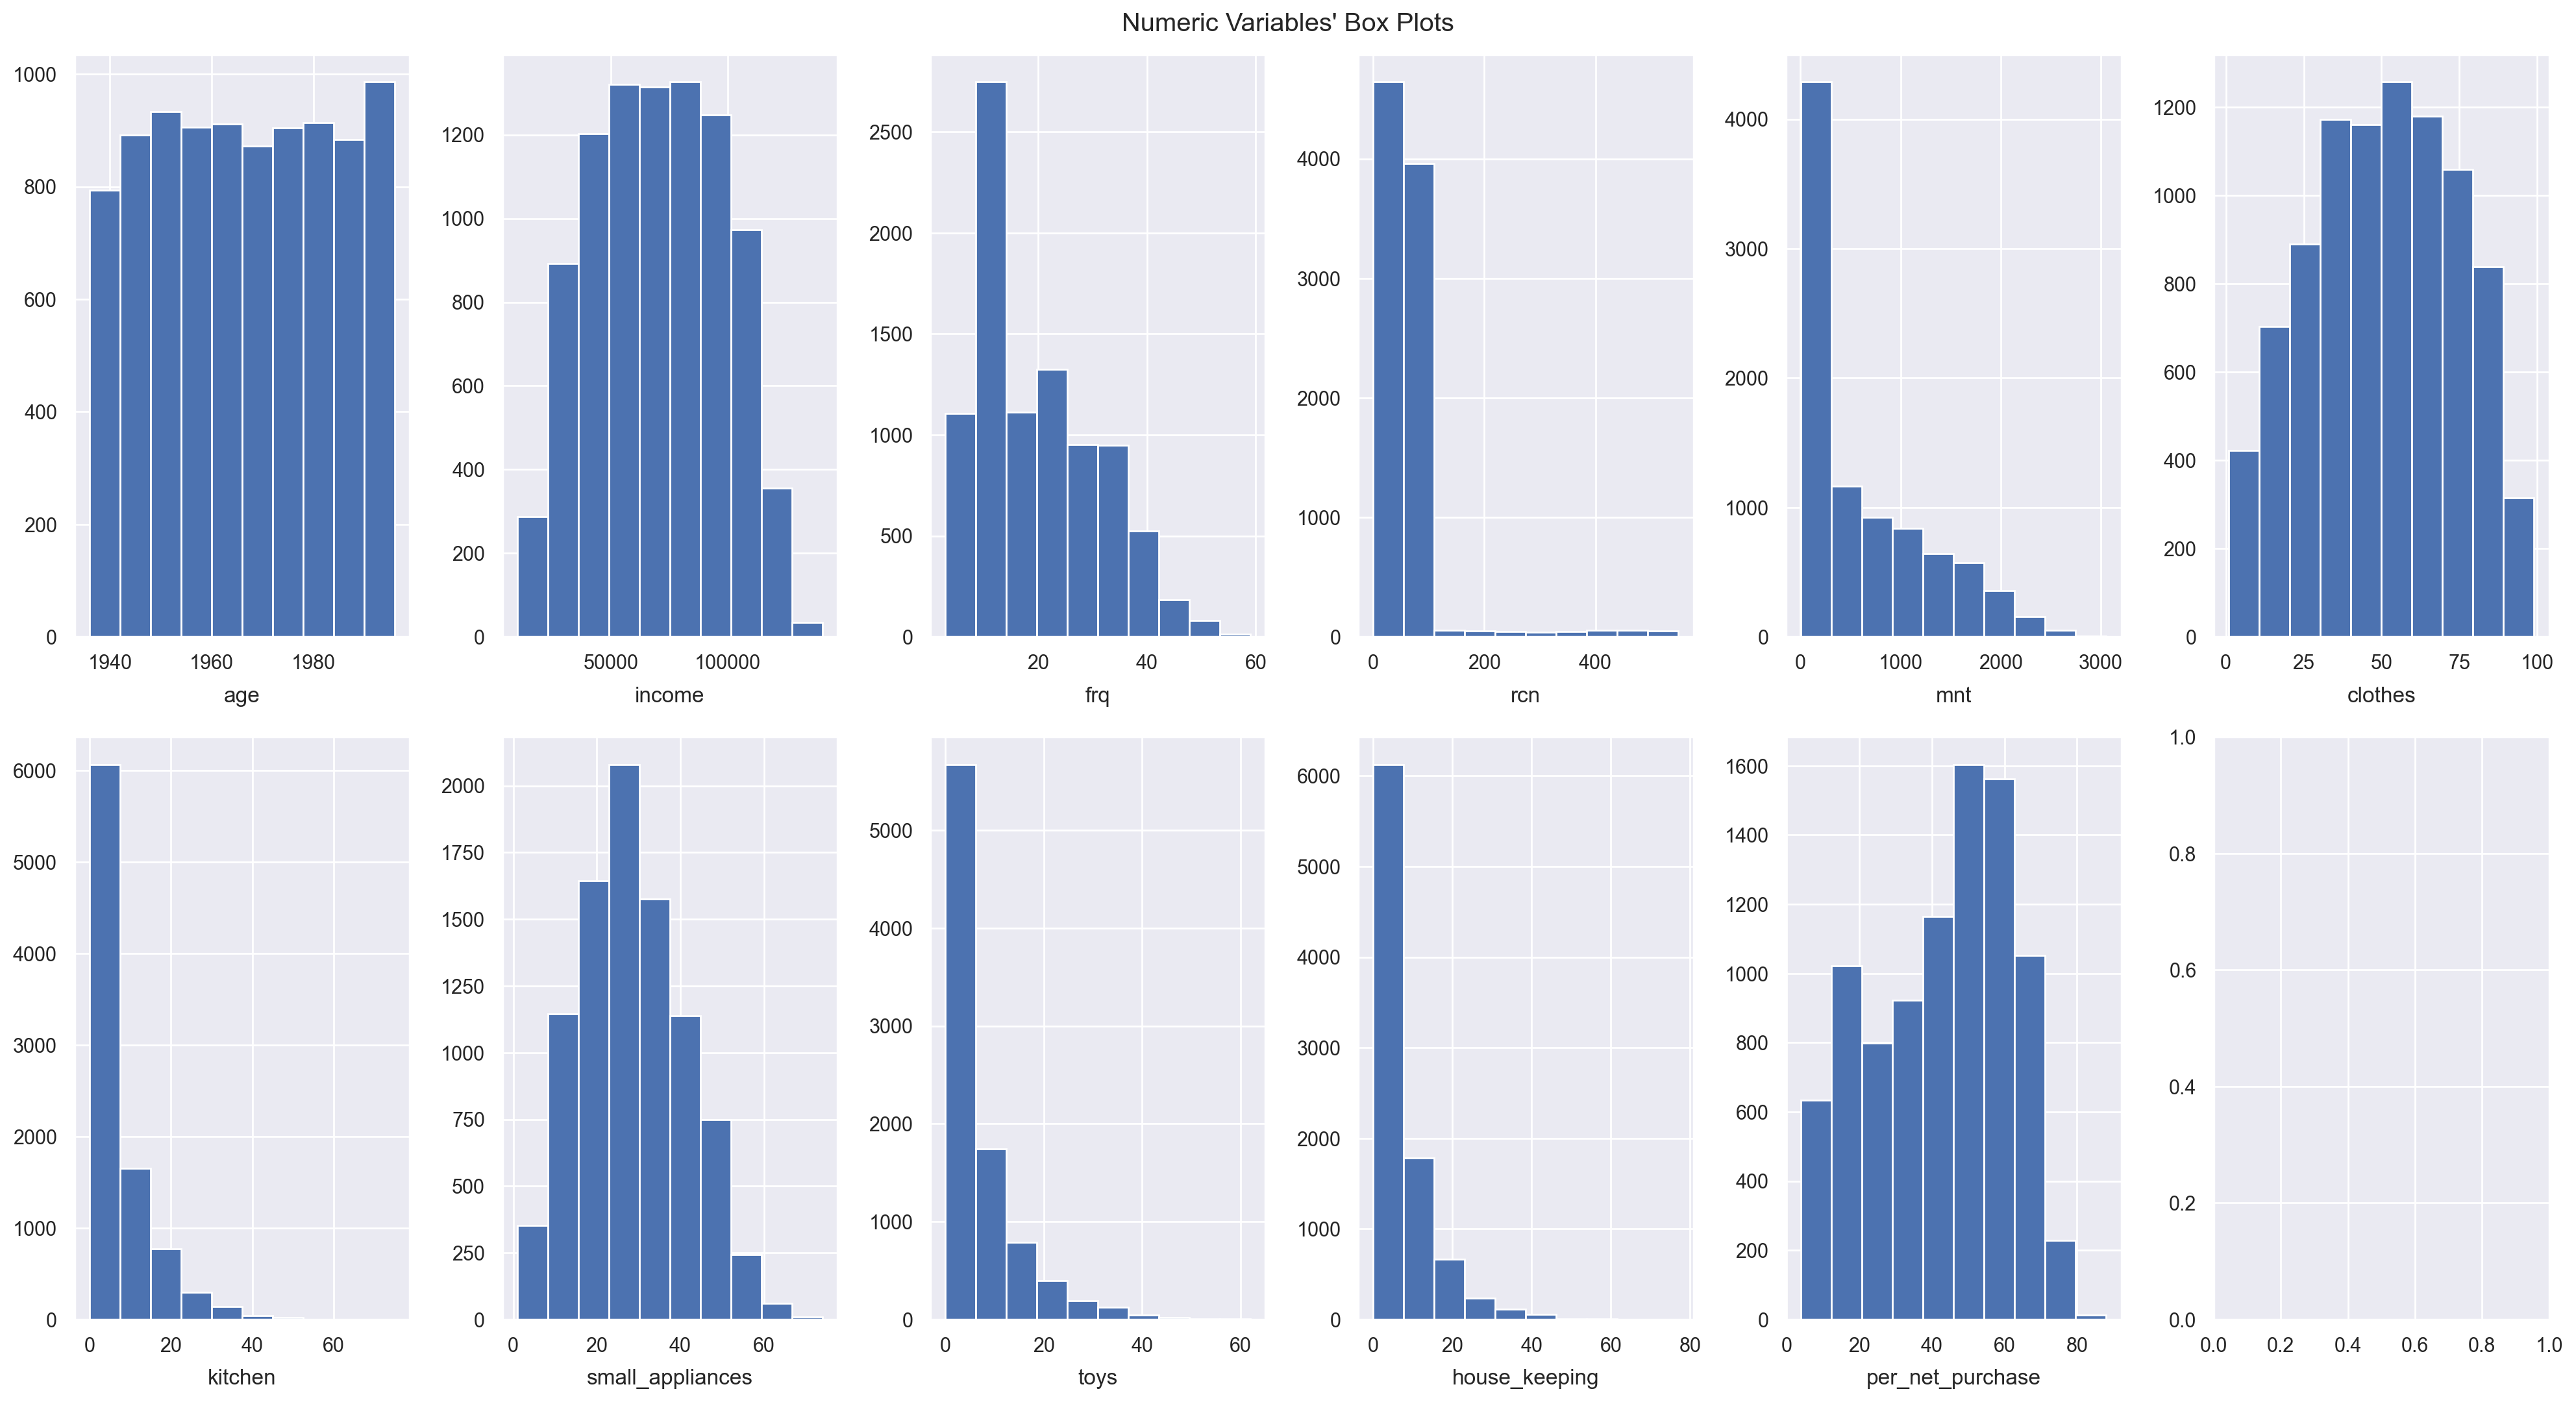

In [21]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set()  ## Reset to darkgrid

## What do these do?
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(
    axes.flatten(), metric_features
):  # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join("..", "figures", "eda")):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join("..", "figures", "eda"))

plt.savefig(
    os.path.join("..", "figures", "eda", "numeric_variables_boxplots.png"), dpi=200
)

plt.show()

What information can we extract from the plots above?

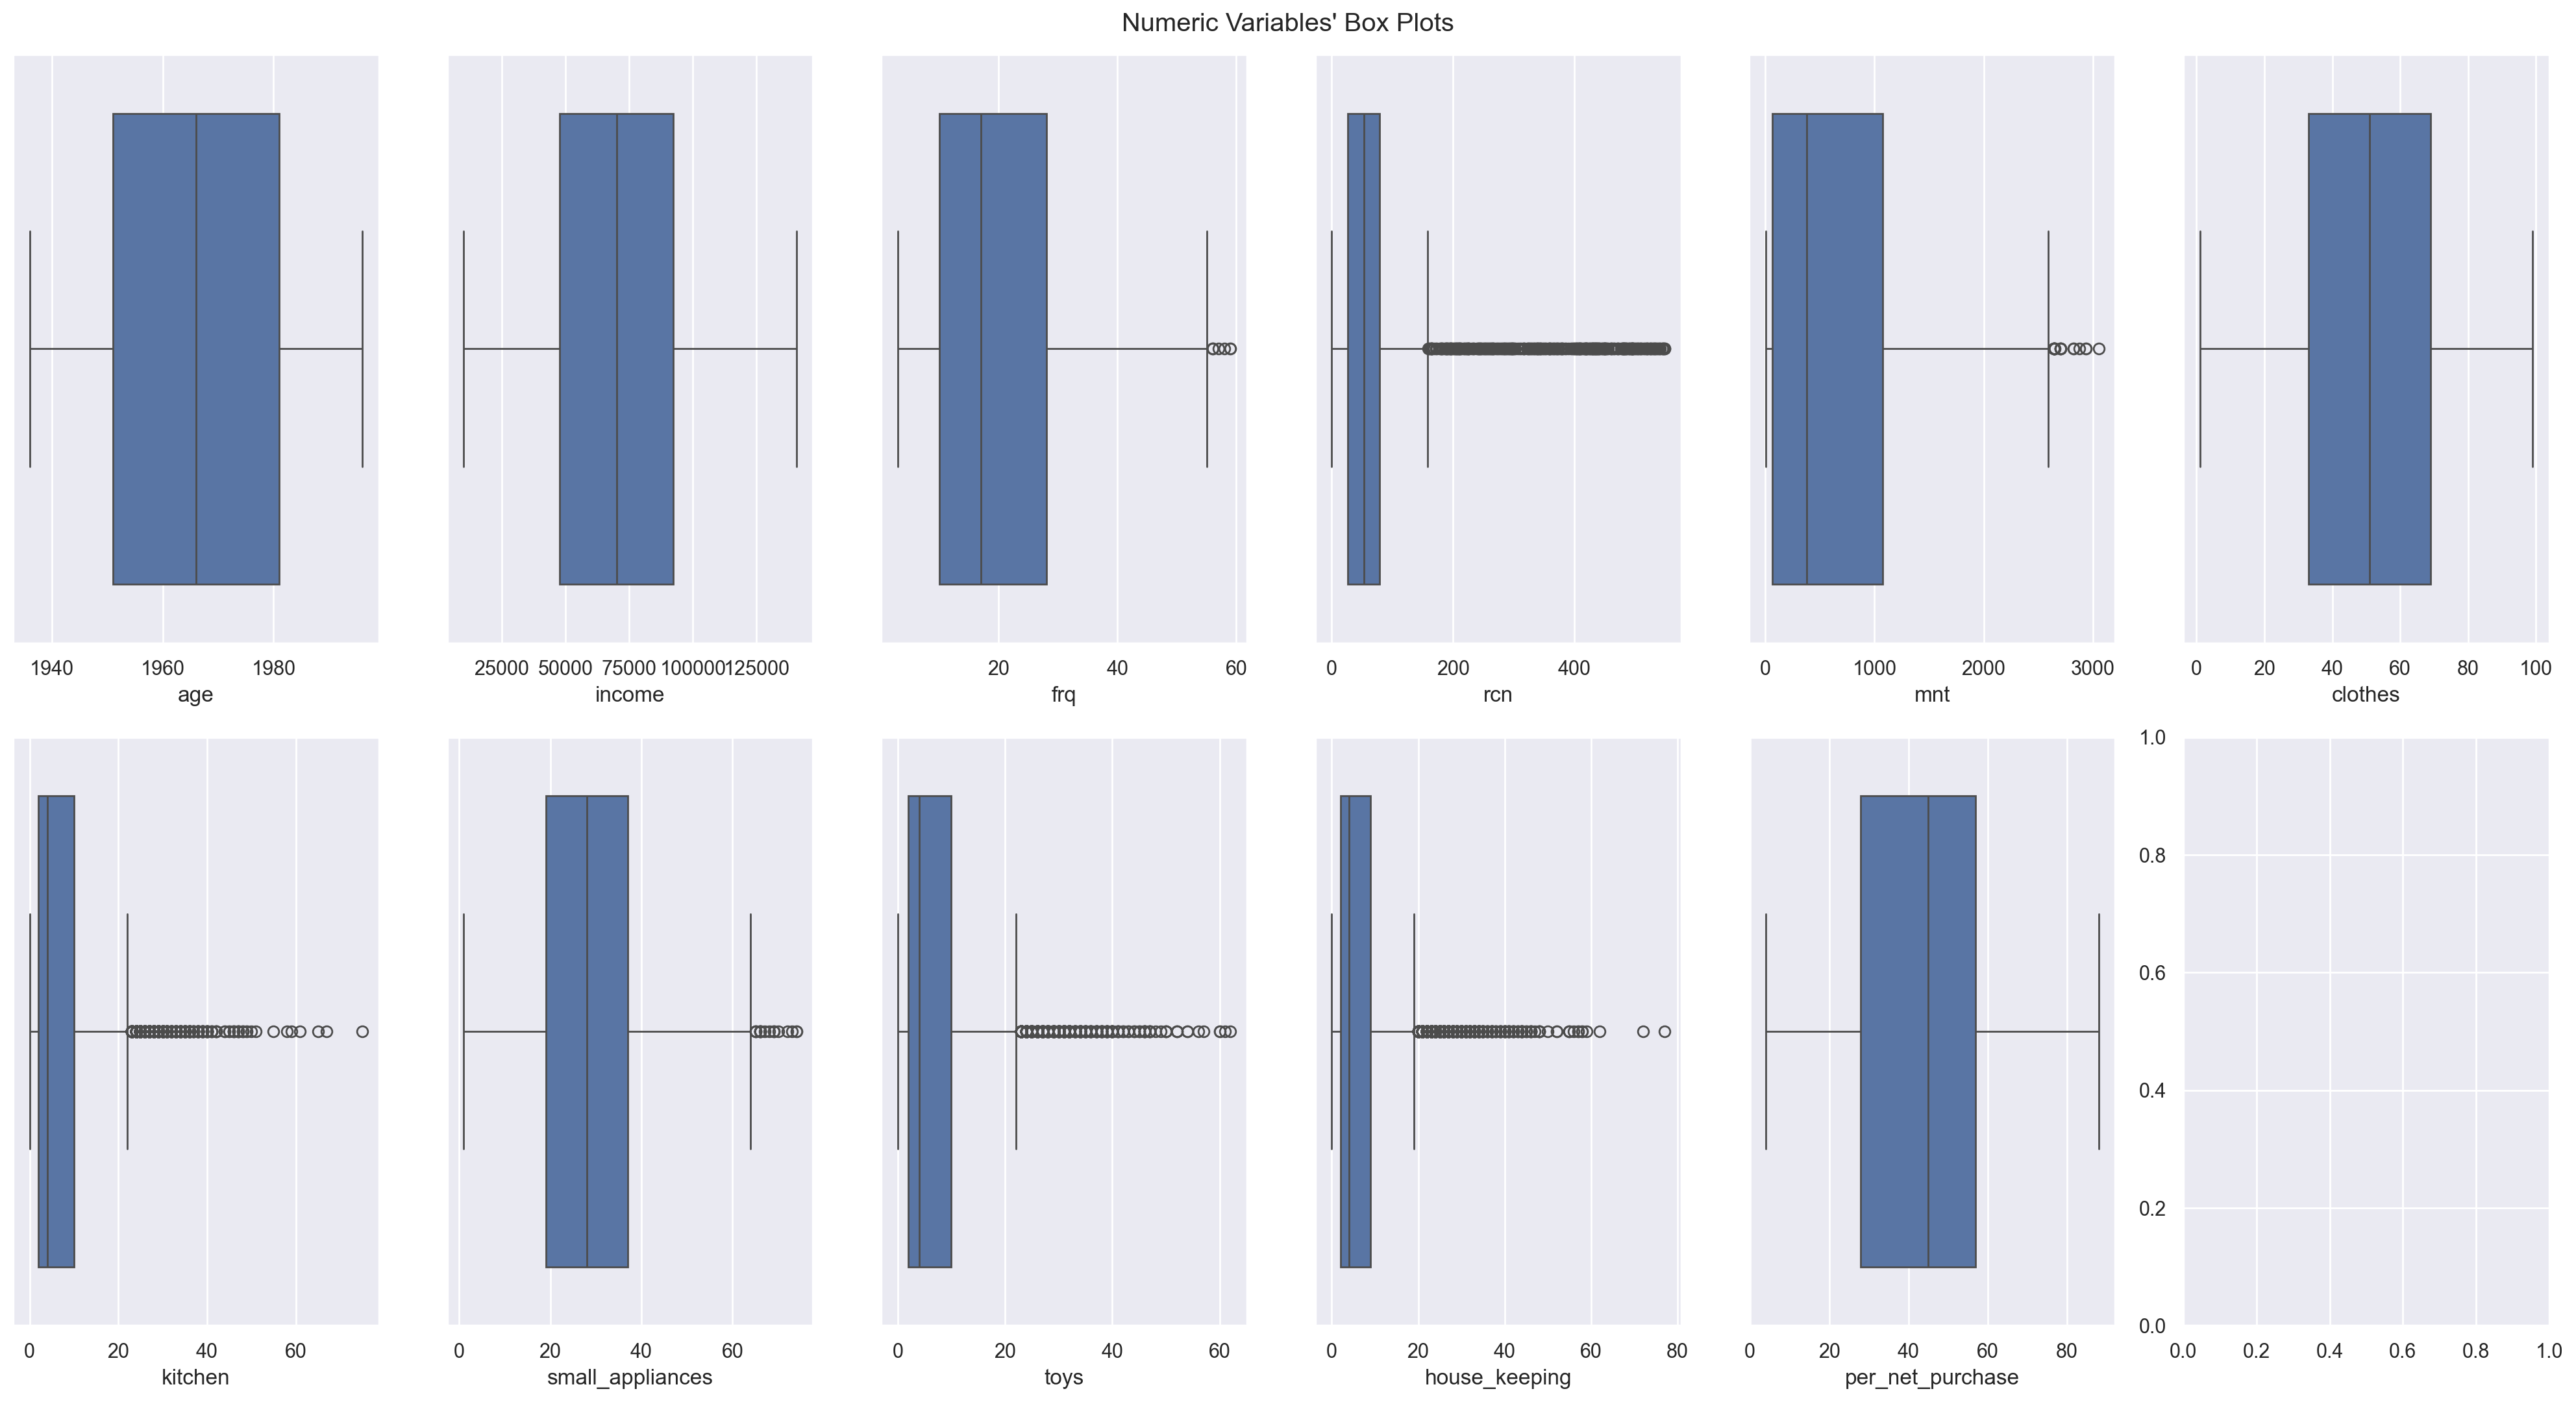

In [22]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set()  ## Reset to darkgrid

## What do these do?
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(
    axes.flatten(), metric_features
):  # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join("..", "figures", "eda")):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join("..", "figures", "eda"))


plt.savefig(
    os.path.join("..", "figures", "eda", "numeric_variables_boxplots.png"), dpi=200
)


plt.show()

### Insights:
- univariate distributions
- potential univariate outliers

--------------------------------------

# More Visualizations: Bivariate Analysis

## Pairwise Relationship of Numerical Variables

### Scatter Plots

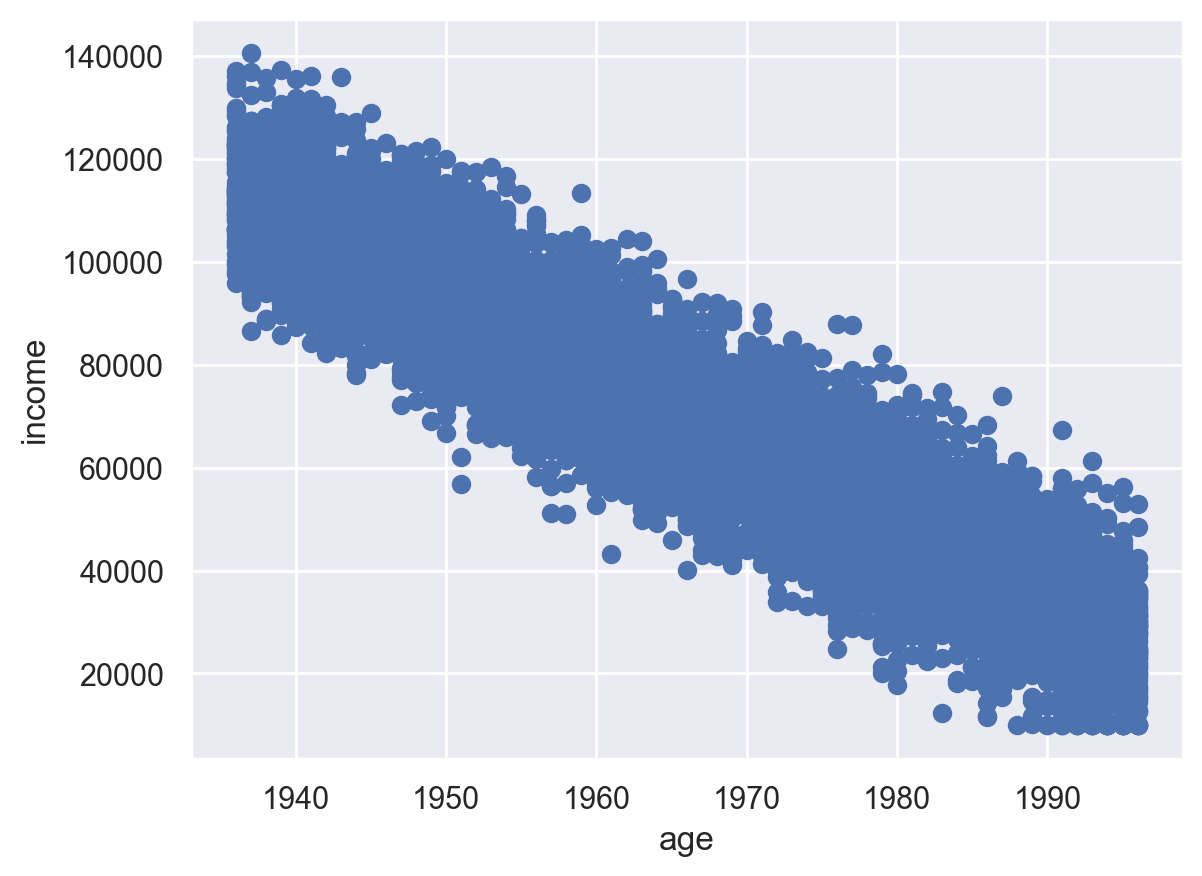

In [23]:
# Pair of Metric Variables Scatter Plot

plt.scatter(df["age"], df["income"])
plt.xlabel("age")
plt.ylabel("income")

plt.show()

# Is this useful?
# How can we improve this visualization?

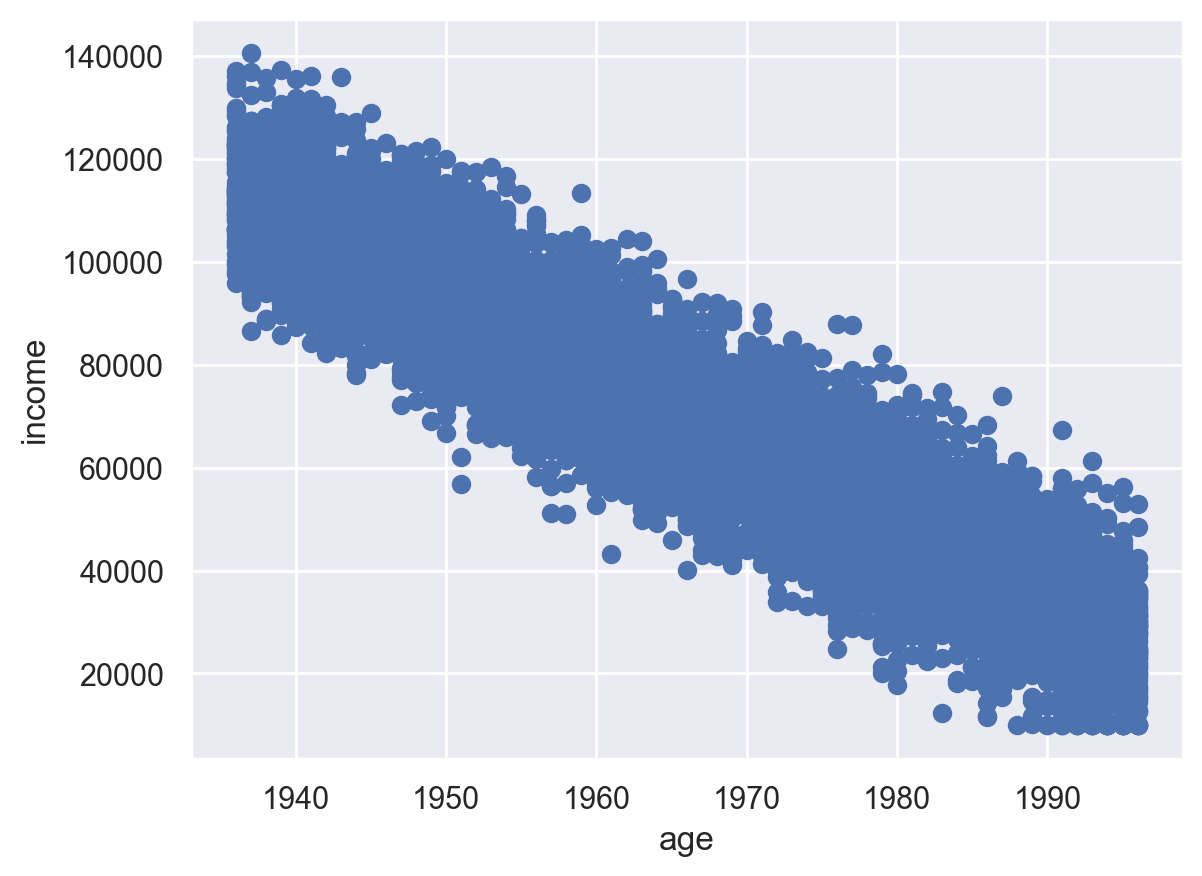

In [24]:
# Single Metric Variable Scatter plot

plt.scatter(
    df["age"],
    df["income"],
    # Draw the edges of each point
    # edgecolors=""
)


plt.xlabel("age")
plt.ylabel("income")

plt.show()

# Is this useful?
# How can we improve this visualization?

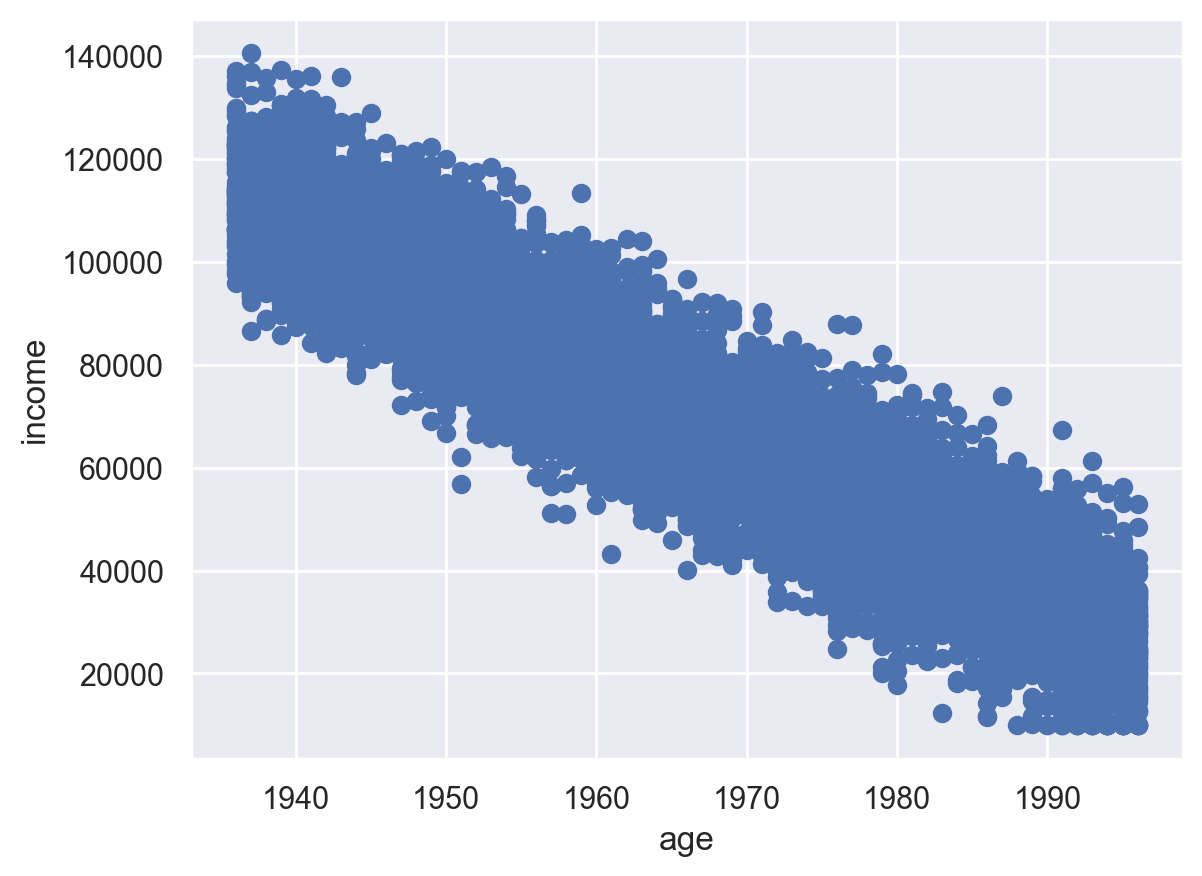

In [25]:
# Pair of Metric Variables Scatter Plot

plt.scatter(
    df["age"],
    df["income"],
    # Draw the edges of each point
    # edgecolors="",
    # Change opacity level of each point
    # alpha=1,
)


plt.xlabel("age")
plt.ylabel("income")

plt.show()

# Is this useful?
# How can we improve this visualization?

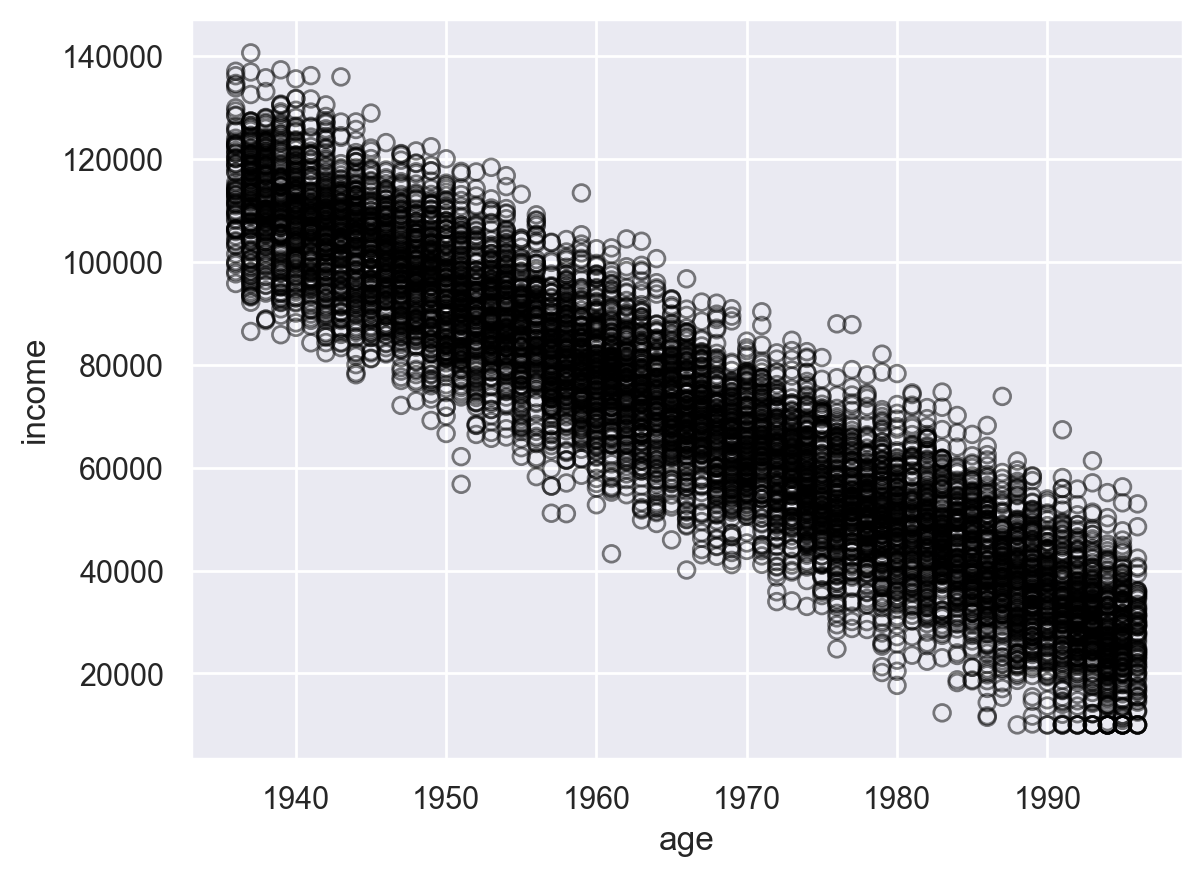

In [26]:
# Pair of Metric Variables Scatter Plot

plt.scatter(
    df["age"],
    df["income"],
    edgecolors="black",  # Draw the edges of each point
    alpha=0.5,  # change opacity level of each point
    color="none",  # remove the fill color of each point
)


plt.xlabel("age")
plt.ylabel("income")

plt.show()

# Is this useful?
# How can we improve this visualization?

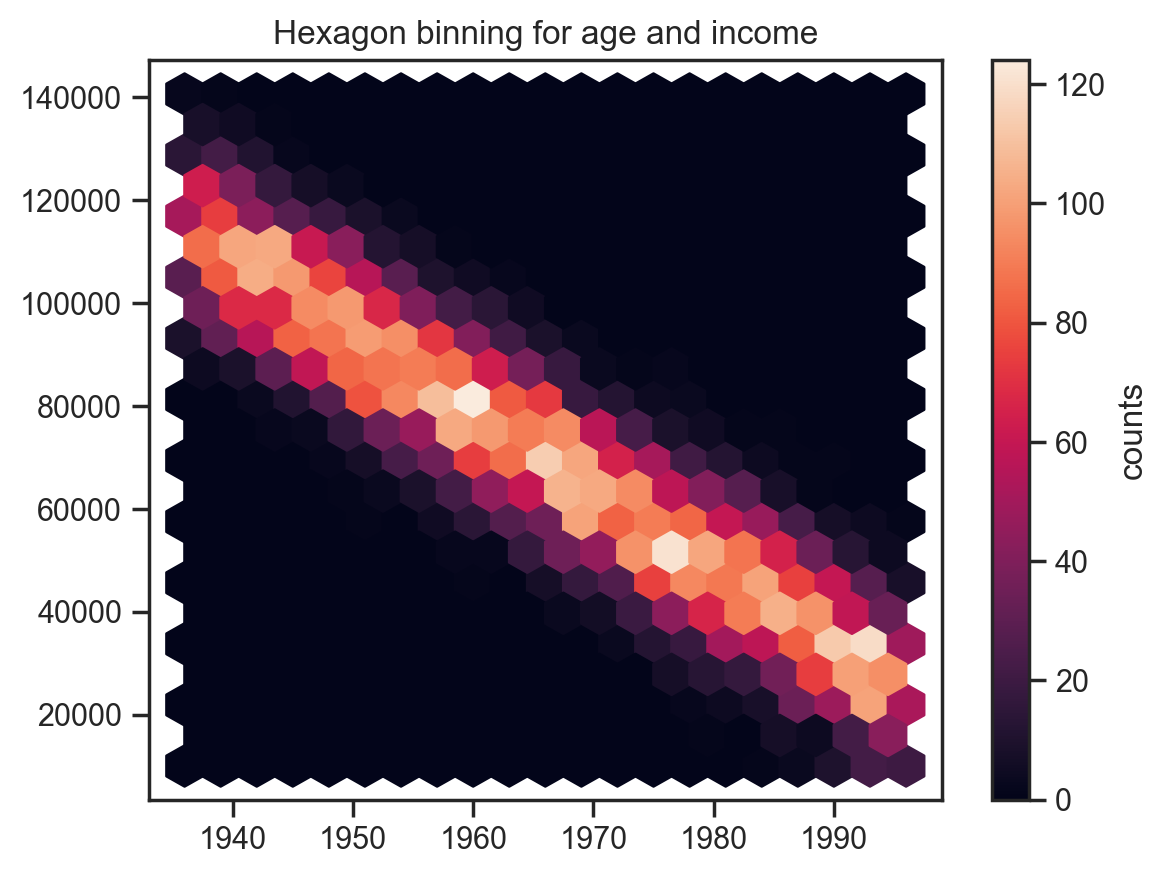

In [27]:
# Pair of Metric Variables Hexbin Plot

sns.set_style("ticks")

fig, ax = plt.subplots()

hb = ax.hexbin(df["age"], df["income"], gridsize=20)

ax.set_title("Hexagon binning for age and income")
cb = fig.colorbar(hb, ax=ax, label="counts")

plt.show()

# Is this useful?
# How can we improve this visualization?

#### Exercise

Improve the previous hexbin (original code already copied below)

Specify a custom color using the cmap parameter: `cmap=""`


**HINT** see default colormaps from matplotlib here: https://matplotlib.org/stable/users/explain/colors/colormaps.html

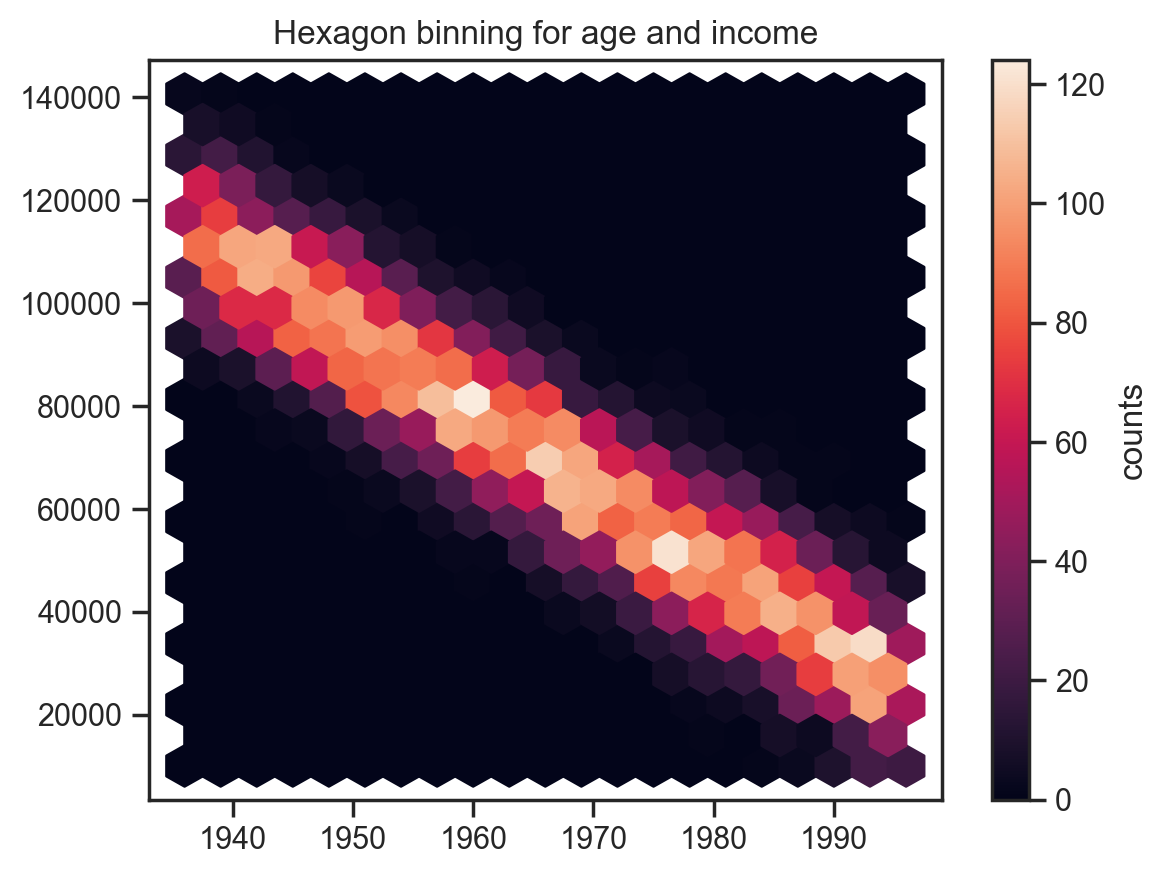

In [28]:
## Improve the colors used here

# Pair of Metric Variables Hexbin Plot

sns.set_style("ticks")

fig, ax = plt.subplots()

hb = ax.hexbin(
    df["age"],
    df["income"],
    gridsize=20,
    ## ADD cmap code HERE
)

ax.set_title("Hexagon binning for age and income")
cb = fig.colorbar(hb, ax=ax, label="counts")

plt.show()

# Is this useful?
# How can we improve this visualization?

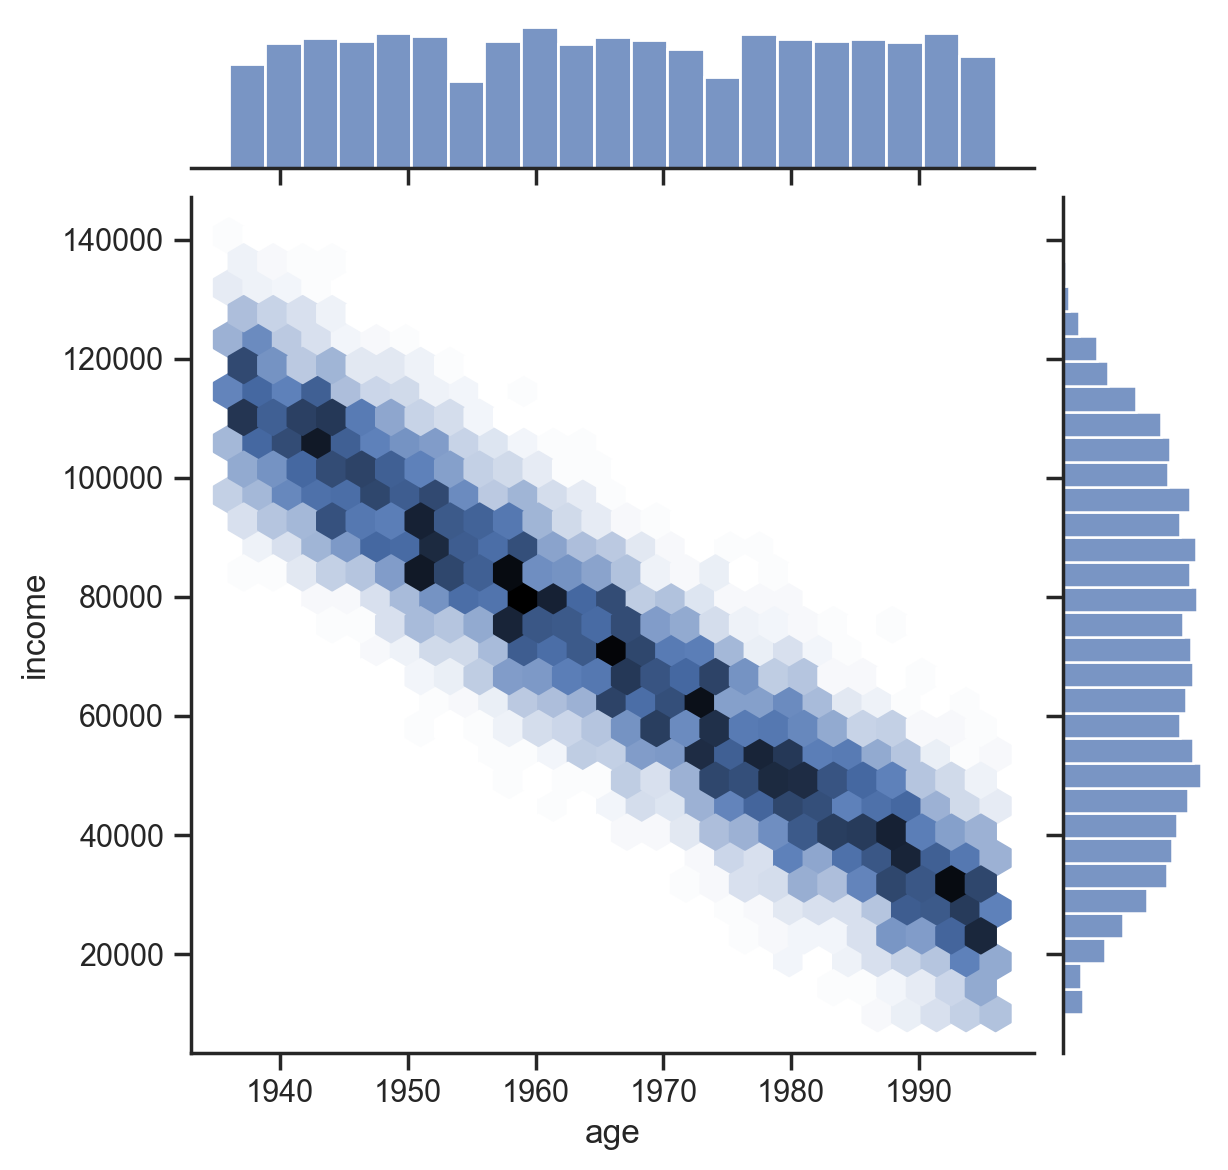

In [29]:
# Using seaborn jointplot

sns.set(style="ticks")
sns.jointplot(
    data=df,
    x="age",
    y="income",
    kind="hex",
)
plt.show()

#### Exercise

Create a jointplot with age on the x-axis, and frq on the y-axis

Specify a custom color using the color parameter: `color=""`


**HINT** see default colormaps from matplotlib here: https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [30]:
## Exercise:
## Create a jointplot with age on the x-axis, and frq on the y-axis
## Specify a custom color using the color parameter: color=""

#### ALL the scatterplots in one figure

This figure will take some time to run

In [ ]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

# if the eda directory is not present then create it first
if not os.path.exists(os.path.join("..", "figures", "eda")):
    os.makedirs(os.path.join("..", "figures", "eda"))

plt.savefig(
    os.path.join("..", "figures", "eda", "pairwise_numeric_scatterplots.png"), dpi=200
)
plt.show()

#### Metric Variables' Correlation Matrix

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix.
corr = df[metric_features].corr(method="pearson")

# Plot heatmap of the correlation matrix
sns.heatmap(
    data=corr,
    annot=True,
)


plt.show()

## How can we improve this figure?

In [ ]:
# Obtain correlation matrix.
corr = df[metric_features].corr(method="pearson")

##########
## 1. Round the values of the correlation matrix to 2 decimal places.
##    Hint: use .round()
##
##########

In [ ]:
##########
## 2. Show only VERY high or VERY low values
##    Build annotation matrix: only values above |0.5| will appear annotated in the plot
##########

## What does this look like?
mask_annot = np.absolute(corr.values) >= 0.5


# Try to understand what this np.where() does
annot = np.where(mask_annot, corr.values, np.full(corr.shape, ""))

In [ ]:
## Let's break this down:

# mask_annot
# corr.values
# np.full(corr.shape,"")

In [ ]:
##########
## Putting it all together
##########

# Prepare figure
fig = plt.figure(figsize=(12, 8))


##########
## 3a. Adjust minimum, maximum, and center values of the color scale
##     Why? HINT: What are the range of values you expect with correlations?
## 3b. Show cells as squares, add line borders for aesthetics
## 3c. Choose better colormap: Why?
##########


# Plot heatmap of the correlation matrix
sns.heatmap(
    data=corr,
    annot=annot,  # Specify custom annotation
    fmt="s",  # The annotation matrix now has strings, so we need to explicitly say this
    ########## 3a.
    ########## 3b.
    ########## 3b.
)

## Once you are happy, save this as an image
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

## How can we improve this figure?

#### Exercise

Show only the lower triangle of the correlation matrix. *Why?*

### A note on correlation coefficients

It is not enough to only look at the values of correlation between variables.

Remember `age` and `small_appliances`? 

In [ ]:
sns.set(style="white")
fig, ax = plt.subplots()
cat1 = "age"
cat2 = "small_appliances"

hb = ax.hexbin(df[cat1], df[cat2], gridsize=20, cmap="Greys")

ax.set_title(
    "{} and {},\ncorr = {}".format(
        cat1, cat2, np.round(df[[cat1, cat2]].corr().values[0, 1], 4)
    )
)
ax.set_xlabel(cat1)
ax.set_ylabel(cat2)

cb = fig.colorbar(hb, ax=ax, label="counts")

plt.show()

### Insights
- possible bivariate relationships
- potential bivariate outliers
- univariate distributions (diagonal)

## Categorical/Low Cardinality Variables' Absolute Frequencies

In [ ]:
# Single Non-Metric variable bar plot
sns.set()  # this resets our formatting defaults
sns.countplot(x=df["education"])

plt.show()

# How can we improve this figure?

Try choosing a custom `color` such as "blue" or "red" or "orange"

Alternatively, you can get values for custom RGB codes for any given color here: https://www.w3schools.com/colors/colors_picker.asp

Any other color picker will do just as well


In [ ]:
# Format the color of a simple bar chart

sns.countplot(x=df["education"])
plt.show()

# How can we improve this figure?

### Exercise

Show the above figure with the bars sorted from largest to smallest. Do this in an automatic way.

`countplot` documentation:

https://seaborn.pydata.org/generated/seaborn.countplot.html

*Hints*

- `countplot` has an `order` parameter.
- `df.value_counts()`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

In [ ]:
## Sort the bars from largest to smallest

sns.countplot(
    x=df["education"],
    order=[
        "1st Cycle",
        "2nd Cycle",
        "Graduation",
        "Master",
        "PhD",
        "OldSchool",
    ],  ## Do this in an automatic way.
)
plt.show()

# How can we improve this figure?

What information can we extract from the plot above?

**Using the same logic from the multiple box plot figure above, build a multiple bar plot figure for each non-metric variable:**

In [ ]:
## Remember:

non_metric_features

In [ ]:
# Remember: dependents has nan values, which cause errors when trying to plot.
df.dependents.unique()

In [ ]:
print("Percentage of rows with dependents missing:")

np.round(df["dependents"].isna().sum() / df.shape[0] * 100, 2)

In [ ]:
# For now, we convert dependents to string and replace the missing values with the string 'NAN'.
# Remember to use df_deps instead of df for visualizing in this section

df_deps = df.copy()
df_deps["dependents"] = df_deps["dependents"].astype("str")

In [ ]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(
    axes.flatten(), non_metric_features
):  # Notice the zip() function and flatten() method
    # What should be here?
    pass  # placeholder to avoid errors when running; remove this

title = "Categorical Variables' Absolute Counts"
plt.suptitle(title)

plt.savefig(
    os.path.join("..", "figures", "eda", "categorical_variables_counts.png"), dpi=200
)
plt.show()

### Insights:
- low frequency values
- high cardinality

### Comparing two categorical variables

In [ ]:
cat1 = "description"
cat2 = "gender"

catpc_df = df.groupby([cat1, cat2])[cat2].size().unstack()

catpc_df.plot.bar(stacked=True)


plt.show()

# Let's break this down

In [ ]:
# Let's break this down

cat1 = "description"
cat2 = "gender"


df.groupby([cat1, cat2])[cat2].size()

In [ ]:
df.groupby([cat1, cat2])[cat2].size().unstack()

In [ ]:
df.groupby([cat1, cat2])[cat2].size().unstack().plot.bar(stacked=True)

plt.show()

# How can we improve this figure?

In [ ]:
# Using seaborn

# sns.countplot does not have stacked option
sns.countplot(df, x="description", hue="gender")

plt.show()

#### Exercise

Plot the relative counts of the bar plots

*Hint* How do we calculate the relative percentage of `dependents` for each category of `description`?


In this case, we want a full bar for each description category. Using the `Horrible` category for example:
```
description      gender
Horrible         F           14
                 M           27
```

We want:
- the `gender=F` part to be `14/(14+27) %` of the bar, and 
- the `gender=M` part to be `27/(14+27) %` of the bar.



In [ ]:
# Remember:
df.groupby([cat1, cat2])[cat2].size().unstack()

In [ ]:
# Here we want the counts of each description category:
# What should be here?

df.groupby([cat1, cat2])[cat2].size().unstack().sum(axis=1)

In [ ]:
# Putting it all together:

cat1 = "description"
cat2 = "gender"

# Many ways to do this
catpc_df = df.groupby([cat1, cat2])[cat2].size() / 1

catpc_df.unstack().plot.bar(stacked=True)


plt.show()

In [ ]:
# What about description vs education?

cat1 = "description"
cat2 = "education"

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

catpc_df = df.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title("Description vs Education, Absolute counts")
axes[0].legend([], frameon=False)  # hide legend on right subplot

catpc_df2 = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size()
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Description vs Education, Relative counts")
axes[1].legend(loc=(1.02, 0))  # reposition legend on right subplot

plt.show()


plt.show()

In [ ]:
# What about description vs education?
# This time flip the two

cat1 = "education"
cat2 = "description"

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

catpc_df = df.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].legend([], frameon=False)
axes[0].set_title("Education vs Description, Absolute counts")

catpc_df2 = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size()

catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Education vs Description, Relative counts")
axes[1].legend(loc=(1.01, 0))

plt.show()


plt.show()

## Comparing a categorical variable vs continuous (or discrete) variables

### Scatterplots

Using seaborn, plot scatterplot of `age` vs `frq`

Use use the 'hue' parameter to color each point according to values of `gender`

In [ ]:
sns.scatterplot(
    df,
    x="age",
    y="frq",
    alpha=0.5,
    hue="gender",
)


plt.show()

# Is this useful?
# How can we improve this visualization?

### Density plots

Now try with seaborn kdeplot

In [ ]:
# Try seaborn kdeplot

sns.kdeplot(df, x="age", y="frq", hue="gender")

plt.show()

Now try these with `hue='dependents'`

In [ ]:
# sns.scatterplot with hue='dependents'

sns.scatterplot(
    df_deps,
    x="age",
    y="frq",
    alpha=0.5,
    hue="dependents",
)


plt.show()

# Is this useful?
# How can we improve this visualization?

In [ ]:
# sns.kdeplot with hue='dependents'

sns.kdeplot(
    df_deps,
    x="age",
    y="frq",
    hue="dependents",
)

plt.show()

### Histograms

In [ ]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set()  ## Reset to darkgrid

sp_rows = 2
sp_cols = 6


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(df_deps, x=feat, ax=ax, bins=10, hue="dependents")

# Layout
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

In [ ]:
## Do this with gender

### Pairplot

In [ ]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features + ["gender"]], diag_kind="hist", hue="gender")

# Layout
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

### Three-way ANOVA

Another example of visualization. Although it is not a simple visualization to produce, it can be very informative.

https://seaborn.pydata.org/examples/pointplot_anova.html

Documentation of `pointplot()`: https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot

In [ ]:
non_metric_features

In [ ]:
# We filter only those with dependents not missing
xfeat = "dependents"
huefeat = "gender"
df_viz = df.loc[~df[xfeat].isna()]
educ_vals = df_viz.education.dropna().unique()

fig, axes = plt.subplots(
    1, len(educ_vals), figsize=(16, 4), tight_layout=True, sharey=True
)

for axi, educ_i in zip(axes, educ_vals):
    data_ = df_viz.loc[df_viz["education"] == educ_i]
    sns.pointplot(
        data=data_,
        y="mnt",
        x=xfeat,
        hue=huefeat,
        errorbar="sd",
        linestyles=["-", "--"],
        capsize=0.1,
        ax=axi,
    )

    axi.legend([], frameon=False)
    axi.set_title(educ_i)


axes[-1].legend(loc=(1.02, 0), title=huefeat)

fig.suptitle("Three-way ANOVA\nmnt, education, dependents, gender")
plt.show()

In [ ]:
# We filter only those with dependents not missing
xfeat = "dependents"
df_viz = df.loc[~df[xfeat].isna()]


# notice we drop missing values in order to not plot it as a distinct value
educ_vals = df_viz.education.dropna().unique()


fig, axes = plt.subplots(
    len(metric_features),  # number of rows of subplots
    len(educ_vals),  # number of cols of subplots
    figsize=(25, 30),  # size of figure
    tight_layout=True,
    sharey="row",
)

for ax, (feat, educ_deg) in zip(axes.flatten(), product(metric_features, educ_vals)):
    # get the data for each subplot
    data = df_viz[df_viz.education == educ_deg].copy()
    data[xfeat] = data[xfeat].astype(str)

    # we are distinguishing points according to the variable "dependents"
    sns.pointplot(
        x=xfeat,
        y=feat,
        hue="gender",
        hue_order=["F", "M"],
        errorbar="sd",
        data=data,
        capsize=0.1,
        linestyles=["-", "--"],
        ax=ax,
    )

    # don't show all the legends
    ax.legend("", frameon=False)

    # set the x labels and legend of each axis
    ax.set_xlabel(xfeat)
    ax.set_title(educ_deg, fontsize=16, y=0.8)


# set metric names
for ax, label in zip(axes[:, 0], metric_features):
    ax.set_ylabel(label, fontsize=13)


# set figure title
plt.suptitle("Three-way ANOVA for each metric variable", fontsize=25, y=1)

# Set legend (gender)
handles, _ = axes[0, 0].get_legend_handles_labels()
fig.legend(
    handles,
    ["F", "M"],
    loc="upper right",
    title="Gender",
    title_fontsize=13,
    ncols=2,
    handlelength=6,
)
fig.subplots_adjust(hspace=0.5)

plt.show()

# A tool to assist you through your exploratory data analysis

Optionally, you may use `pandas-profiling` as a first approach to your data analysis. Remember, although this tool provides excelent insights about the data you're working with, it is not enough to perform a proper analysis.

In [ ]:
profile = ProfileReport(
    df,
    title="Tugas Customer Data",
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

In [ ]:
profile.to_notebook_iframe()

In [ ]:
profile.to_file(os.path.join("..", "figures", "eda", "tugas_customer_data.html"))

# Optional Exercise

Download the [Spaceship Titanic dataset](https://www.kaggle.com/competitions/spaceship-titanic/data). Using the  `train.csv` file, perform the same exercises that we did in this notebook.

Identify the metric and non-metric features in this dataset.

Identify if any problems exist:

- Duplicates?
- Data types?
- Missing values?
- Strange values?
- Descriptive statistics?


Visualize the different variables present in this dataset. Are there any interesting relationships present? 



# Tools and resources for better visualizations

https://www.simplifiedsciencepublishing.com/resources/best-color-palettes-for-scientific-figures-and-data-visualizations

https://python-graph-gallery.com/

https://www.visualcinnamon.com/ (Tutorials are mostly in JavaScript and R, but very good aesthetics)


# During our Exploratory Data Analysis (EDA), we must also account for:
- Incoherencies
- Outliers
- Missing values
- Feature Engineering

# Questions?


# NEXT Notebook: Data Preprocessing

## Depending on the context, various steps must be considered when performing Data Preprocessing. 

The most relevant steps are the following:
- Coherence check (find inconsistent values, missing values, outliers and any other problem you may find in your dataset)
- Data editing (fix inconsistent values)
- Data cleansing (drop observations - Outlier removal and removal of inconsistent values and/or features)
- Data wrangling (feature extraction/engineering and transformation)
- Data reduction (reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)